## Exploratory Data Analysis (EDA):

### Import Liabraries :

In [1]:
# Our classic imports
import numpy as np
import pandas as pd
import plotly.graph_objects as go
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
import xgboost as xgb
import shap
from sklearn import datasets, ensemble
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import classification_report

### Load the dataset into a pandas DataFrame:

In [2]:
data_path = "../raw_data/aw_fb_data.csv"

df = pd.read_csv(data_path)

df

,Unnamed: 0,X1,age,gender,height,weight,steps,hear_rate,calories,distance,entropy_heart,entropy_setps,resting_heart,corr_heart_steps,norm_heart,intensity_karvonen,sd_norm_heart,steps_times_distance,device,activity
0,1,1,20,1,168.0,65.4,10.771429,78.531302,0.344533,0.008327,6.221612,6.116349,59.0,1.000000,19.531302,0.138520,1.000000,0.089692,apple watch,Lying
1,2,2,20,1,168.0,65.4,11.475325,78.453390,3.287625,0.008896,6.221612,6.116349,59.0,1.000000,19.453390,0.137967,1.000000,0.102088,apple watch,Lying
2,3,3,20,1,168.0,65.4,12.179221,78.540825,9.484000,0.009466,6.221612,6.116349,59.0,1.000000,19.540825,0.138587,1.000000,0.115287,apple watch,Lying
3,4,4,20,1,168.0,65.4,12.883117,78.628260,10.154556,0.010035,6.221612,6.116349,59.0,1.000000,19.628260,0.139208,1.000000,0.129286,apple watch,Lying
4,5,5,20,1,168.0,65.4,13.587013,78.715695,10.825111,0.010605,6.221612,6.116349,59.0,0.982816,19.715695,0.139828,0.241567,0.144088,apple watch,Lying
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6259,6260,3666,46,0,157.5,71.4,1.000000,35.000000,20.500000,1.000000,0.000000,0.000000,35.0,1.000000,0.000000,0.000000,0.000000,1.000000,fitbit,Running 7 METs
6260,6261,3667,46,0,157.5,71.4,1.000000,35.000000,20.500000,1.000000,0.000000,0.000000,35.0,1.000000,0.000000,0.000000,1.000000,1.000000,fitbit,Running 7 METs
6261,6262,3668,46,0,157.5,71.4,1.000000,35.000000,20.500000,1.000000,0.000000,0.000000,35.0,1.000000,0.000000,0.000000,1.000000,1.000000,fitbit,Running 7 METs
6262,6263,3669,46,0,157.5,71.4,1.000000,35.000000,20.500000,1.000000,0.000000,0.000000,35.0,1.000000,0.000000,0.000000,1.000000,1.000000,fitbit,Running 7 METs


In [3]:
df.shape

(6264, 20)

In [4]:
df.dtypes

Unnamed: 0                int64
X1                        int64
age                       int64
gender                    int64
height                  float64
weight                  float64
steps                   float64
hear_rate               float64
calories                float64
distance                float64
entropy_heart           float64
entropy_setps           float64
resting_heart           float64
corr_heart_steps        float64
norm_heart              float64
intensity_karvonen      float64
sd_norm_heart           float64
steps_times_distance    float64
device                   object
activity                 object
dtype: object

In [5]:
df.columns

Index(['Unnamed: 0', 'X1', 'age', 'gender', 'height', 'weight', 'steps',
       'hear_rate', 'calories', 'distance', 'entropy_heart', 'entropy_setps',
       'resting_heart', 'corr_heart_steps', 'norm_heart', 'intensity_karvonen',
       'sd_norm_heart', 'steps_times_distance', 'device', 'activity'],
      dtype='object')

In [6]:
df['activity'].unique()

array(['Lying', 'Sitting', 'Self Pace walk', 'Running 3 METs',
       'Running 5 METs', 'Running 7 METs'], dtype=object)

In [7]:
df.describe()

,Unnamed: 0,X1,age,gender,height,weight,steps,hear_rate,calories,distance,entropy_heart,entropy_setps,resting_heart,corr_heart_steps,norm_heart,intensity_karvonen,sd_norm_heart,steps_times_distance
count,6264.000000,6264.000000,6264.000000,6264.000000,6264.000000,6264.000000,6264.000000,6264.000000,6264.000000,6264.000000,6264.000000,6264.000000,6264.000000,6264.000000,6264.000000,6264.000000,6264.000000,6264.000000
mean,3132.500000,1771.144317,29.158525,0.476533,169.709052,69.614464,109.562268,86.142331,19.471823,13.832555,6.030314,5.739984,65.869938,0.306447,20.272393,0.155479,8.110854,590.035239
std,1808.405375,1097.988748,8.908978,0.499489,10.324698,13.451878,222.797908,28.648385,27.309765,45.941437,0.765574,1.256348,21.203017,0.775418,28.388116,0.210927,12.535080,4063.838530
min,1.000000,1.000000,18.000000,0.000000,143.000000,43.000000,1.000000,2.222222,0.056269,0.000440,0.000000,0.000000,3.000000,-1.000000,-76.000000,-2.714286,0.000000,0.000690
25%,1566.750000,789.750000,23.000000,0.000000,160.000000,60.000000,5.159534,75.598079,0.735875,0.019135,6.108524,5.909440,58.134333,-0.467303,1.148883,0.009819,0.264722,0.659260
50%,3132.500000,1720.000000,28.000000,0.000000,168.000000,68.000000,10.092029,77.267680,4.000000,0.181719,6.189825,6.157197,75.000000,0.665829,9.820254,0.079529,2.893503,13.368619
75%,4698.250000,2759.250000,33.000000,1.000000,180.000000,77.300000,105.847222,95.669118,20.500000,15.697188,6.247928,6.247928,76.138701,1.000000,27.077336,0.211868,9.679672,93.728562
max,6264.000000,3670.000000,56.000000,1.000000,191.000000,115.000000,1714.000000,194.333333,97.500000,335.000000,6.475733,6.475733,155.000000,1.000000,156.319444,1.297980,74.457929,51520.000000


### Data Cleaning :

In [8]:
df1 = df.copy()
df1.drop(['Unnamed: 0', 'X1'], axis=1, inplace=True)
df1.head()

,age,gender,height,weight,steps,hear_rate,calories,distance,entropy_heart,entropy_setps,resting_heart,corr_heart_steps,norm_heart,intensity_karvonen,sd_norm_heart,steps_times_distance,device,activity
0,20,1,168.0,65.4,10.771429,78.531302,0.344533,0.008327,6.221612,6.116349,59.0,1.000000,19.531302,0.138520,1.000000,0.089692,apple watch,Lying
1,20,1,168.0,65.4,11.475325,78.453390,3.287625,0.008896,6.221612,6.116349,59.0,1.000000,19.453390,0.137967,1.000000,0.102088,apple watch,Lying
2,20,1,168.0,65.4,12.179221,78.540825,9.484000,0.009466,6.221612,6.116349,59.0,1.000000,19.540825,0.138587,1.000000,0.115287,apple watch,Lying
3,20,1,168.0,65.4,12.883117,78.628260,10.154556,0.010035,6.221612,6.116349,59.0,1.000000,19.628260,0.139208,1.000000,0.129286,apple watch,Lying
4,20,1,168.0,65.4,13.587013,78.715695,10.825111,0.010605,6.221612,6.116349,59.0,0.982816,19.715695,0.139828,0.241567,0.144088,apple watch,Lying


In [9]:
df1.columns

Index(['age', 'gender', 'height', 'weight', 'steps', 'hear_rate', 'calories',
       'distance', 'entropy_heart', 'entropy_setps', 'resting_heart',
       'corr_heart_steps', 'norm_heart', 'intensity_karvonen', 'sd_norm_heart',
       'steps_times_distance', 'device', 'activity'],
      dtype='object')

In [10]:
df1.rename(columns={'hear_rate': 'heart_rate', 'entropy_setps': 'entropy_steps'}, inplace=True)

df1.columns

Index(['age', 'gender', 'height', 'weight', 'steps', 'heart_rate', 'calories',
       'distance', 'entropy_heart', 'entropy_steps', 'resting_heart',
       'corr_heart_steps', 'norm_heart', 'intensity_karvonen', 'sd_norm_heart',
       'steps_times_distance', 'device', 'activity'],
      dtype='object')

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15],
 [Text(0, 0, 'age'),
  Text(1, 0, 'gender'),
  Text(2, 0, 'height'),
  Text(3, 0, 'weight'),
  Text(4, 0, 'steps'),
  Text(5, 0, 'heart_rate'),
  Text(6, 0, 'calories'),
  Text(7, 0, 'distance'),
  Text(8, 0, 'entropy_heart'),
  Text(9, 0, 'entropy_steps'),
  Text(10, 0, 'resting_heart'),
  Text(11, 0, 'corr_heart_steps'),
  Text(12, 0, 'norm_heart'),
  Text(13, 0, 'intensity_karvonen'),
  Text(14, 0, 'sd_norm_heart'),
  Text(15, 0, 'steps_times_distance')])

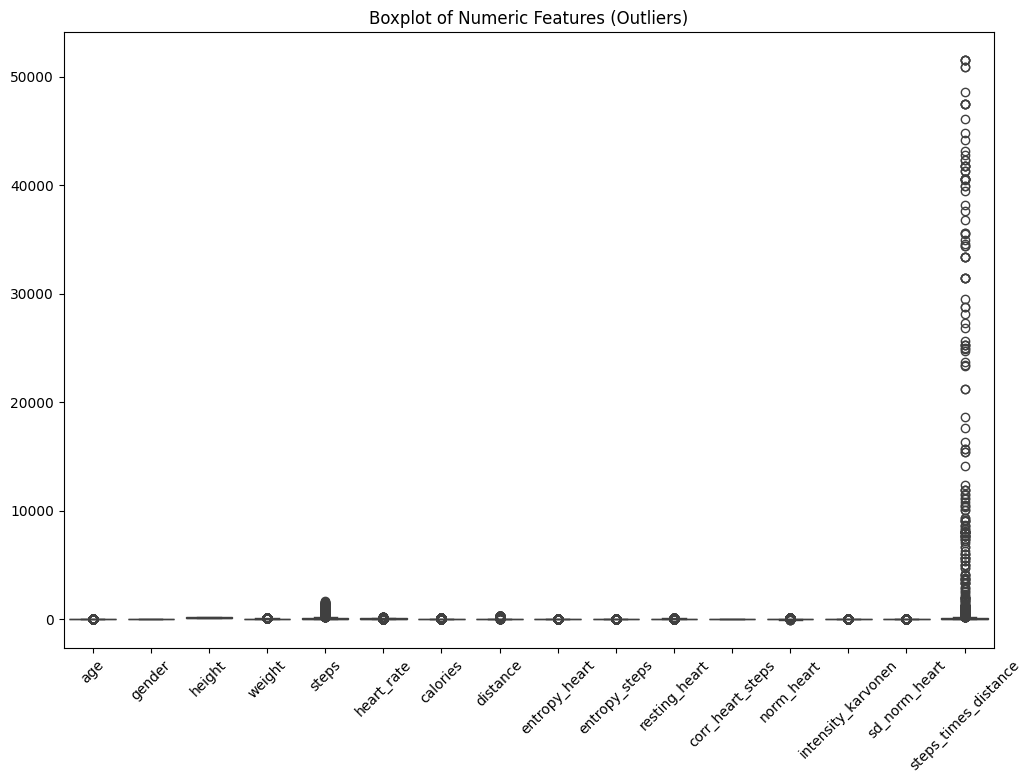

In [11]:
numeric_columns = df1.select_dtypes(include='number')

plt.figure(figsize=(12, 8))
sns.boxplot(data=numeric_columns)
plt.title('Boxplot of Numeric Features (Outliers)')
plt.xticks(rotation=45)

In [12]:
df1.isnull().sum()

age                     0
gender                  0
height                  0
weight                  0
steps                   0
heart_rate              0
calories                0
distance                0
entropy_heart           0
entropy_steps           0
resting_heart           0
corr_heart_steps        0
norm_heart              0
intensity_karvonen      0
sd_norm_heart           0
steps_times_distance    0
device                  0
activity                0
dtype: int64

In [13]:
df1 = df1.dropna()

In [14]:
print(df1.duplicated().sum())

10


Since only 10 duplicate rows are present, which is very less compared to the entire dataset, so we can ignore dropping them. 

In [15]:
# Find duplicate rows in the DataFrame
duplicate_rows = df1[df1.duplicated()]

In [16]:
# Print the duplicate rows
print("Duplicate Rows:")
print(duplicate_rows)

Duplicate Rows:
      age  gender  height  weight  steps  heart_rate  calories  distance  \
5081   37       1   183.0   115.0    1.0       155.0      75.0       1.0   
5082   37       1   183.0   115.0    1.0       155.0      75.0       1.0   
5085   18       1   180.3    90.0    1.0         3.0       3.5       1.0   
5087   18       1   180.3    90.0    1.0         3.0       3.5       1.0   
5305   48       1   170.0    88.0    1.0       139.0      20.5       1.0   
5306   48       1   170.0    88.0    1.0       139.0      20.5       1.0   
5310   20       1   184.0    77.3    1.0         4.0       4.0       1.0   
6261   46       0   157.5    71.4    1.0        35.0      20.5       1.0   
6262   46       0   157.5    71.4    1.0        35.0      20.5       1.0   
6263   46       0   157.5    71.4    1.0        35.0      20.5       1.0   

      entropy_heart  entropy_steps  resting_heart  corr_heart_steps  \
5081       0.106792       0.106792          155.0               1.0   
5082 

### Splitting Data as Apple and Fitbit :

In [17]:
df1_apple = df1[df1['device']=='apple watch']
df1_fitbit = df1[df1['device']=='fitbit']

In [18]:
df1_apple.head()

,age,gender,height,weight,steps,heart_rate,calories,distance,entropy_heart,entropy_steps,resting_heart,corr_heart_steps,norm_heart,intensity_karvonen,sd_norm_heart,steps_times_distance,device,activity
0,20,1,168.0,65.4,10.771429,78.531302,0.344533,0.008327,6.221612,6.116349,59.0,1.000000,19.531302,0.138520,1.000000,0.089692,apple watch,Lying
1,20,1,168.0,65.4,11.475325,78.453390,3.287625,0.008896,6.221612,6.116349,59.0,1.000000,19.453390,0.137967,1.000000,0.102088,apple watch,Lying
2,20,1,168.0,65.4,12.179221,78.540825,9.484000,0.009466,6.221612,6.116349,59.0,1.000000,19.540825,0.138587,1.000000,0.115287,apple watch,Lying
3,20,1,168.0,65.4,12.883117,78.628260,10.154556,0.010035,6.221612,6.116349,59.0,1.000000,19.628260,0.139208,1.000000,0.129286,apple watch,Lying
4,20,1,168.0,65.4,13.587013,78.715695,10.825111,0.010605,6.221612,6.116349,59.0,0.982816,19.715695,0.139828,0.241567,0.144088,apple watch,Lying


In [19]:
df1_fitbit.head()

,age,gender,height,weight,steps,heart_rate,calories,distance,entropy_heart,entropy_steps,resting_heart,corr_heart_steps,norm_heart,intensity_karvonen,sd_norm_heart,steps_times_distance,device,activity
3656,20,1,168.0,65.4,1.0,132.000000,1.0,1.0,5.938588,2.179799,130.428571,1.000000,1.571429,0.022587,1.000000,1.0,fitbit,Lying
3657,20,1,168.0,65.4,1.0,132.777778,1.0,1.0,5.938588,2.179799,130.428571,1.000000,2.349206,0.033767,1.000000,1.0,fitbit,Lying
3658,20,1,168.0,65.4,1.0,129.888889,1.0,1.0,5.938588,2.179799,130.428571,1.000000,-0.539683,-0.007757,1.000000,1.0,fitbit,Lying
3659,20,1,168.0,65.4,1.0,129.142857,1.0,1.0,5.938588,2.179799,130.428571,1.000000,-1.285714,-0.018480,1.000000,1.0,fitbit,Lying
3660,20,1,168.0,65.4,1.0,134.555556,3.5,1.0,5.938588,2.179799,130.428571,-0.493589,4.126984,0.059320,1.368007,1.0,fitbit,Self Pace walk


In [20]:
df1_fitbit['activity'].value_counts()

activity
Lying             592
Running 7 METs    501
Running 5 METs    399
Running 3 METs    378
Sitting           378
Self Pace walk    360
Name: count, dtype: int64

In [21]:
df1_apple['activity'].value_counts()

activity
Lying             787
Running 7 METs    613
Running 5 METs    603
Running 3 METs    572
Sitting           552
Self Pace walk    529
Name: count, dtype: int64

<Axes: ylabel='count'>

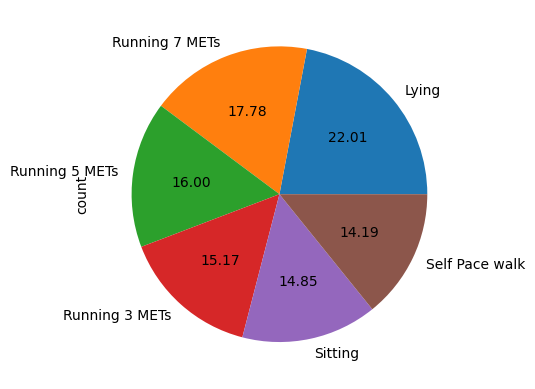

In [22]:
df1['activity'].value_counts().plot(kind='pie',autopct='%.2f')

<Axes: ylabel='count'>

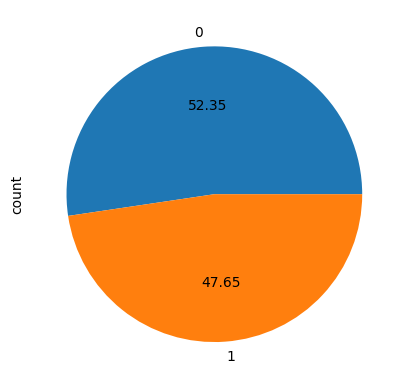

In [23]:
df1['gender'].value_counts().plot(kind='pie',autopct='%.2f')

In [24]:
df_num= df1.select_dtypes(include="number")

<Axes: >

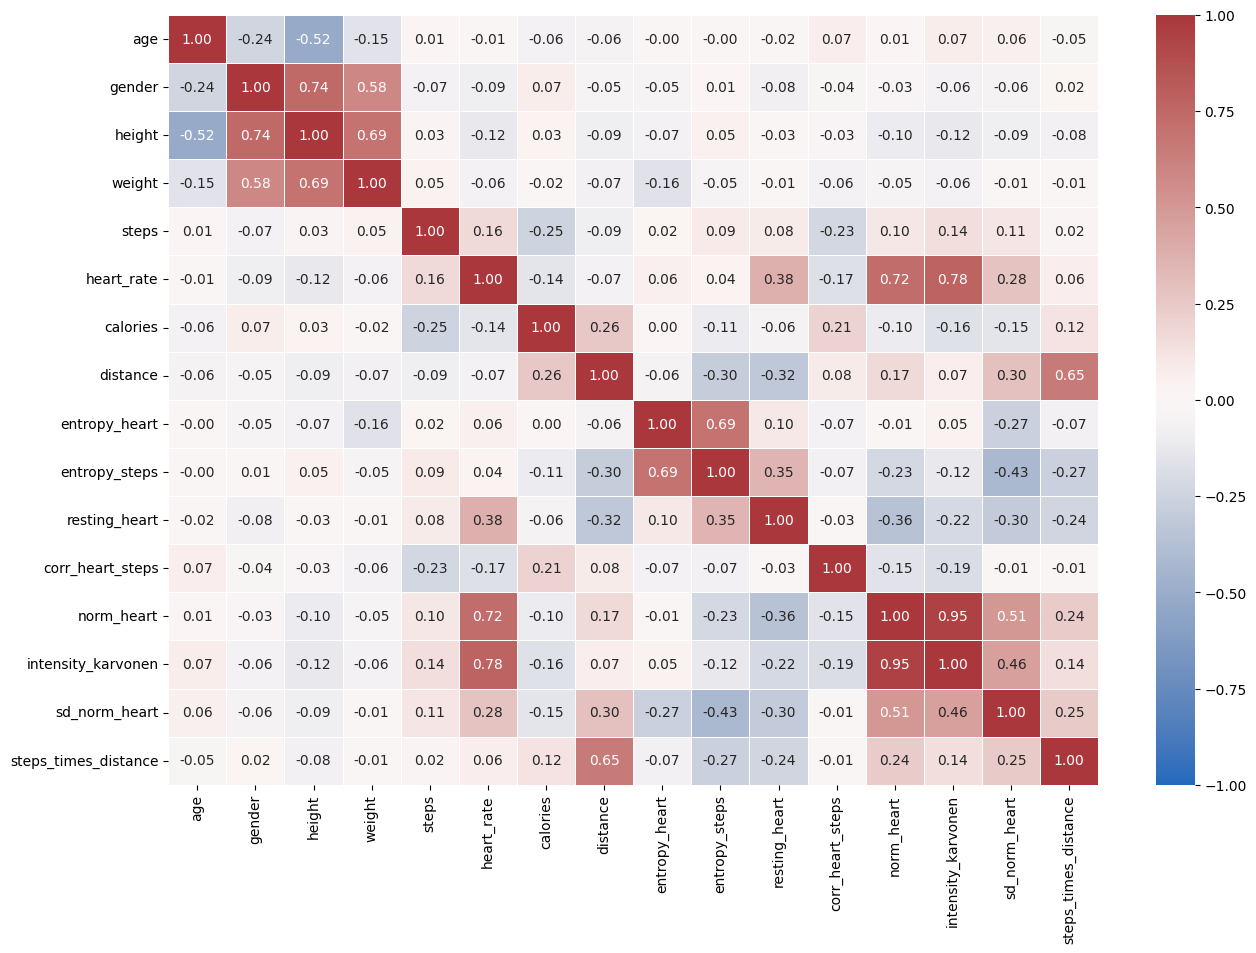

In [25]:
plt.figure(figsize=(15,10))
sns.heatmap(df_num.corr(), annot=True, center=0, linewidths=.5, fmt='.2f', vmin=-1, vmax=1, cmap='vlag')

<Axes: xlabel='device', ylabel='activity'>

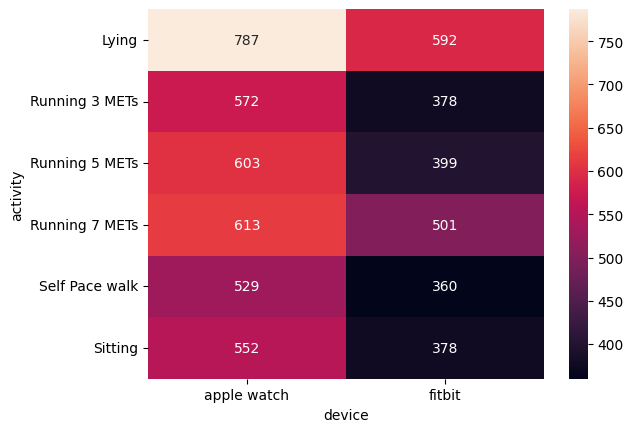

In [26]:
sns.heatmap(pd.crosstab(df1["activity"],df1["device"]),annot=True,fmt='d')

In [27]:
df1.device.value_counts()

device
apple watch    3656
fitbit         2608
Name: count, dtype: int64

array([[<Axes: title={'center': 'age'}>,
        <Axes: title={'center': 'gender'}>,
        <Axes: title={'center': 'height'}>,
        <Axes: title={'center': 'weight'}>],
       [<Axes: title={'center': 'steps'}>,
        <Axes: title={'center': 'heart_rate'}>,
        <Axes: title={'center': 'calories'}>,
        <Axes: title={'center': 'distance'}>],
       [<Axes: title={'center': 'entropy_heart'}>,
        <Axes: title={'center': 'entropy_steps'}>,
        <Axes: title={'center': 'resting_heart'}>,
        <Axes: title={'center': 'corr_heart_steps'}>],
       [<Axes: title={'center': 'norm_heart'}>,
        <Axes: title={'center': 'intensity_karvonen'}>,
        <Axes: title={'center': 'sd_norm_heart'}>,
        <Axes: title={'center': 'steps_times_distance'}>]], dtype=object)

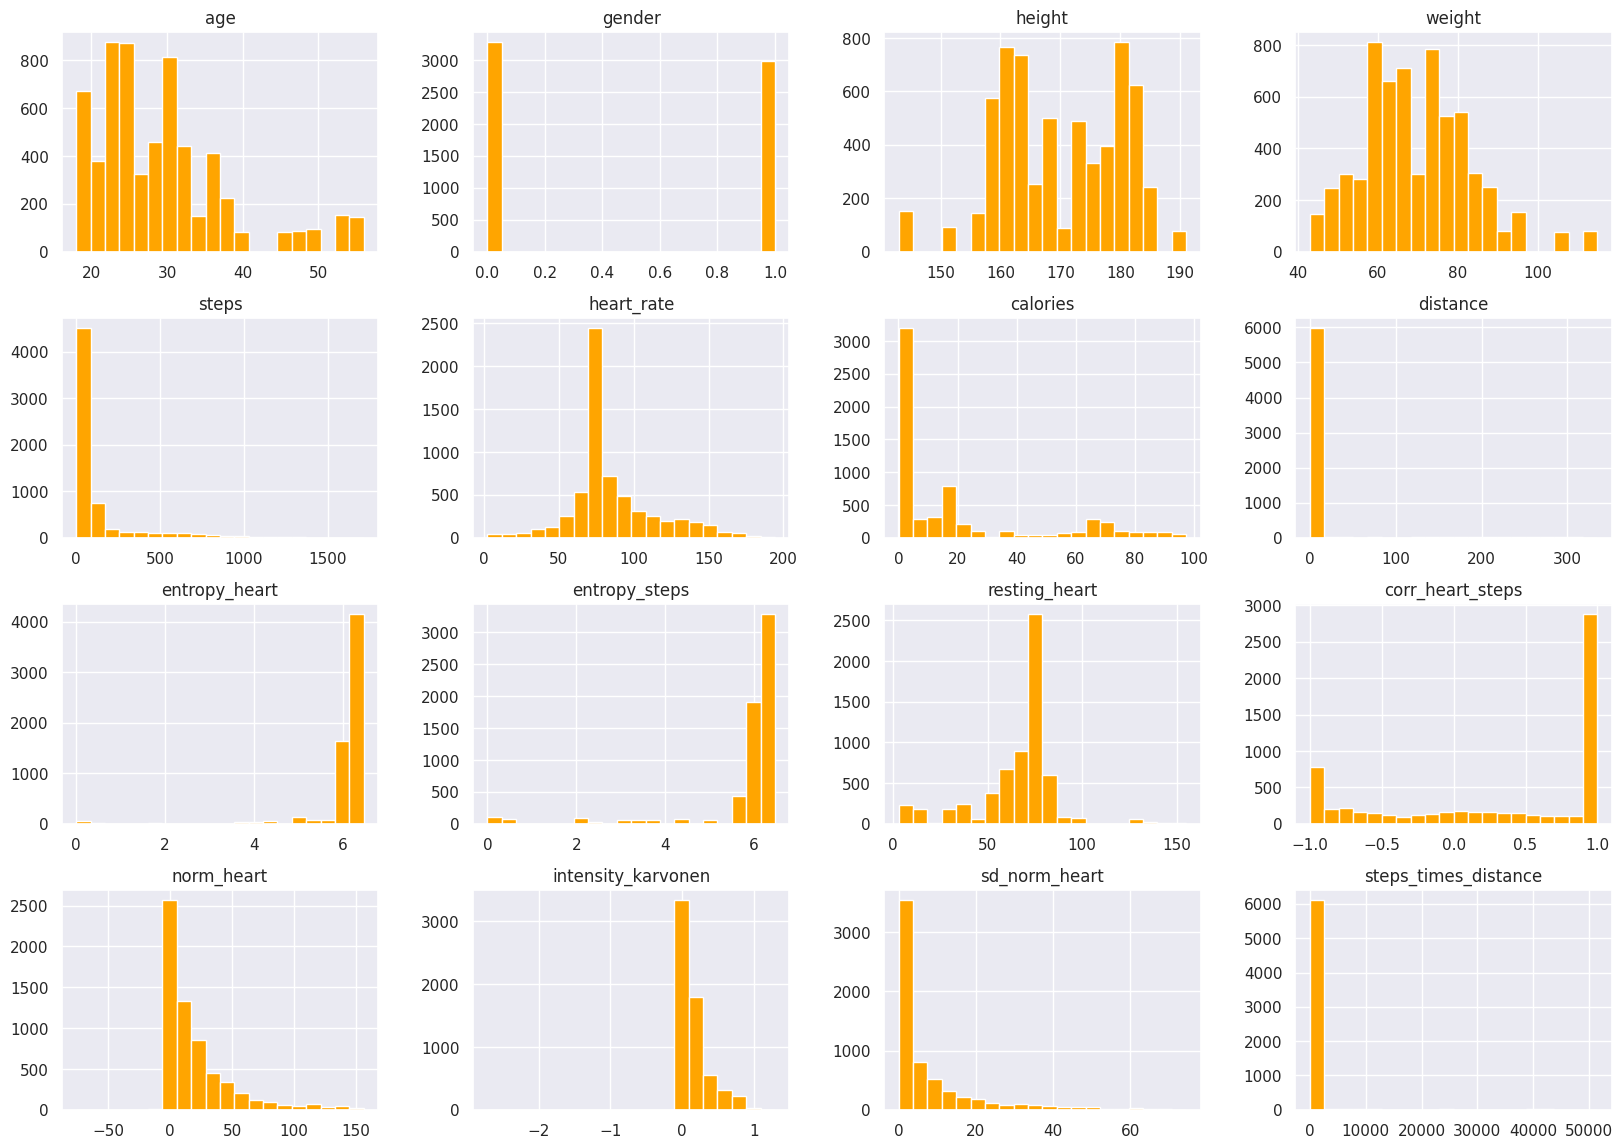

In [28]:
sns.set(font_scale = 1)

df1.hist(bins = 20, color = 'orange', figsize = (20, 14))

## Feature Engineering

### Create a unique identifyer for each participant

In [29]:
df1.columns

Index(['age', 'gender', 'height', 'weight', 'steps', 'heart_rate', 'calories',
       'distance', 'entropy_heart', 'entropy_steps', 'resting_heart',
       'corr_heart_steps', 'norm_heart', 'intensity_karvonen', 'sd_norm_heart',
       'steps_times_distance', 'device', 'activity'],
      dtype='object')

In [30]:
df1.insert(loc=0, column='participant_id', value = df1.set_index(['age', 'gender', 'height', 'weight']).index.factorize()[0]+1)

In [31]:
df1

,participant_id,age,gender,height,weight,steps,heart_rate,calories,distance,entropy_heart,entropy_steps,resting_heart,corr_heart_steps,norm_heart,intensity_karvonen,sd_norm_heart,steps_times_distance,device,activity
0,1,20,1,168.0,65.4,10.771429,78.531302,0.344533,0.008327,6.221612,6.116349,59.0,1.000000,19.531302,0.138520,1.000000,0.089692,apple watch,Lying
1,1,20,1,168.0,65.4,11.475325,78.453390,3.287625,0.008896,6.221612,6.116349,59.0,1.000000,19.453390,0.137967,1.000000,0.102088,apple watch,Lying
2,1,20,1,168.0,65.4,12.179221,78.540825,9.484000,0.009466,6.221612,6.116349,59.0,1.000000,19.540825,0.138587,1.000000,0.115287,apple watch,Lying
3,1,20,1,168.0,65.4,12.883117,78.628260,10.154556,0.010035,6.221612,6.116349,59.0,1.000000,19.628260,0.139208,1.000000,0.129286,apple watch,Lying
4,1,20,1,168.0,65.4,13.587013,78.715695,10.825111,0.010605,6.221612,6.116349,59.0,0.982816,19.715695,0.139828,0.241567,0.144088,apple watch,Lying
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6259,49,46,0,157.5,71.4,1.000000,35.000000,20.500000,1.000000,0.000000,0.000000,35.0,1.000000,0.000000,0.000000,0.000000,1.000000,fitbit,Running 7 METs
6260,49,46,0,157.5,71.4,1.000000,35.000000,20.500000,1.000000,0.000000,0.000000,35.0,1.000000,0.000000,0.000000,1.000000,1.000000,fitbit,Running 7 METs
6261,49,46,0,157.5,71.4,1.000000,35.000000,20.500000,1.000000,0.000000,0.000000,35.0,1.000000,0.000000,0.000000,1.000000,1.000000,fitbit,Running 7 METs
6262,49,46,0,157.5,71.4,1.000000,35.000000,20.500000,1.000000,0.000000,0.000000,35.0,1.000000,0.000000,0.000000,1.000000,1.000000,fitbit,Running 7 METs


In [32]:
df1.groupby('participant_id').count()

,age,gender,height,weight,steps,heart_rate,calories,distance,entropy_heart,entropy_steps,resting_heart,corr_heart_steps,norm_heart,intensity_karvonen,sd_norm_heart,steps_times_distance,device,activity
participant_id,,,,,,,,,,,,,,,,,,
1,140,140,140,140,140,140,140,140,140,140,140,140,140,140,140,140,140,140
2,142,142,142,142,142,142,142,142,142,142,142,142,142,142,142,142,142,142
3,146,146,146,146,146,146,146,146,146,146,146,146,146,146,146,146,146,146
4,144,144,144,144,144,144,144,144,144,144,144,144,144,144,144,144,144,144
5,138,138,138,138,138,138,138,138,138,138,138,138,138,138,138,138,138,138
6,156,156,156,156,156,156,156,156,156,156,156,156,156,156,156,156,156,156
7,152,152,152,152,152,152,152,152,152,152,152,152,152,152,152,152,152,152
8,144,144,144,144,144,144,144,144,144,144,144,144,144,144,144,144,144,144
9,148,148,148,148,148,148,148,148,148,148,148,148,148,148,148,148,148,148


In [33]:
df1['bmi'] = round(df1.weight / (df1.height/100)**2)
df1.head()

,participant_id,age,gender,height,weight,steps,heart_rate,calories,distance,entropy_heart,entropy_steps,resting_heart,corr_heart_steps,norm_heart,intensity_karvonen,sd_norm_heart,steps_times_distance,device,activity,bmi
0,1,20,1,168.0,65.4,10.771429,78.531302,0.344533,0.008327,6.221612,6.116349,59.0,1.000000,19.531302,0.138520,1.000000,0.089692,apple watch,Lying,23.0
1,1,20,1,168.0,65.4,11.475325,78.453390,3.287625,0.008896,6.221612,6.116349,59.0,1.000000,19.453390,0.137967,1.000000,0.102088,apple watch,Lying,23.0
2,1,20,1,168.0,65.4,12.179221,78.540825,9.484000,0.009466,6.221612,6.116349,59.0,1.000000,19.540825,0.138587,1.000000,0.115287,apple watch,Lying,23.0
3,1,20,1,168.0,65.4,12.883117,78.628260,10.154556,0.010035,6.221612,6.116349,59.0,1.000000,19.628260,0.139208,1.000000,0.129286,apple watch,Lying,23.0
4,1,20,1,168.0,65.4,13.587013,78.715695,10.825111,0.010605,6.221612,6.116349,59.0,0.982816,19.715695,0.139828,0.241567,0.144088,apple watch,Lying,23.0


### Pairplot with core features

In [34]:
df1.columns

Index(['participant_id', 'age', 'gender', 'height', 'weight', 'steps',
       'heart_rate', 'calories', 'distance', 'entropy_heart', 'entropy_steps',
       'resting_heart', 'corr_heart_steps', 'norm_heart', 'intensity_karvonen',
       'sd_norm_heart', 'steps_times_distance', 'device', 'activity', 'bmi'],
      dtype='object')

In [35]:
df1_core_features = df1[['participant_id','age', 'gender', 'height','weight', 'steps', 'heart_rate', 'calories', 'distance', 'bmi']]

df1_core_features

,participant_id,age,gender,height,weight,steps,heart_rate,calories,distance,bmi
0,1,20,1,168.0,65.4,10.771429,78.531302,0.344533,0.008327,23.0
1,1,20,1,168.0,65.4,11.475325,78.453390,3.287625,0.008896,23.0
2,1,20,1,168.0,65.4,12.179221,78.540825,9.484000,0.009466,23.0
3,1,20,1,168.0,65.4,12.883117,78.628260,10.154556,0.010035,23.0
4,1,20,1,168.0,65.4,13.587013,78.715695,10.825111,0.010605,23.0
...,...,...,...,...,...,...,...,...,...,...
6259,49,46,0,157.5,71.4,1.000000,35.000000,20.500000,1.000000,29.0
6260,49,46,0,157.5,71.4,1.000000,35.000000,20.500000,1.000000,29.0
6261,49,46,0,157.5,71.4,1.000000,35.000000,20.500000,1.000000,29.0
6262,49,46,0,157.5,71.4,1.000000,35.000000,20.500000,1.000000,29.0


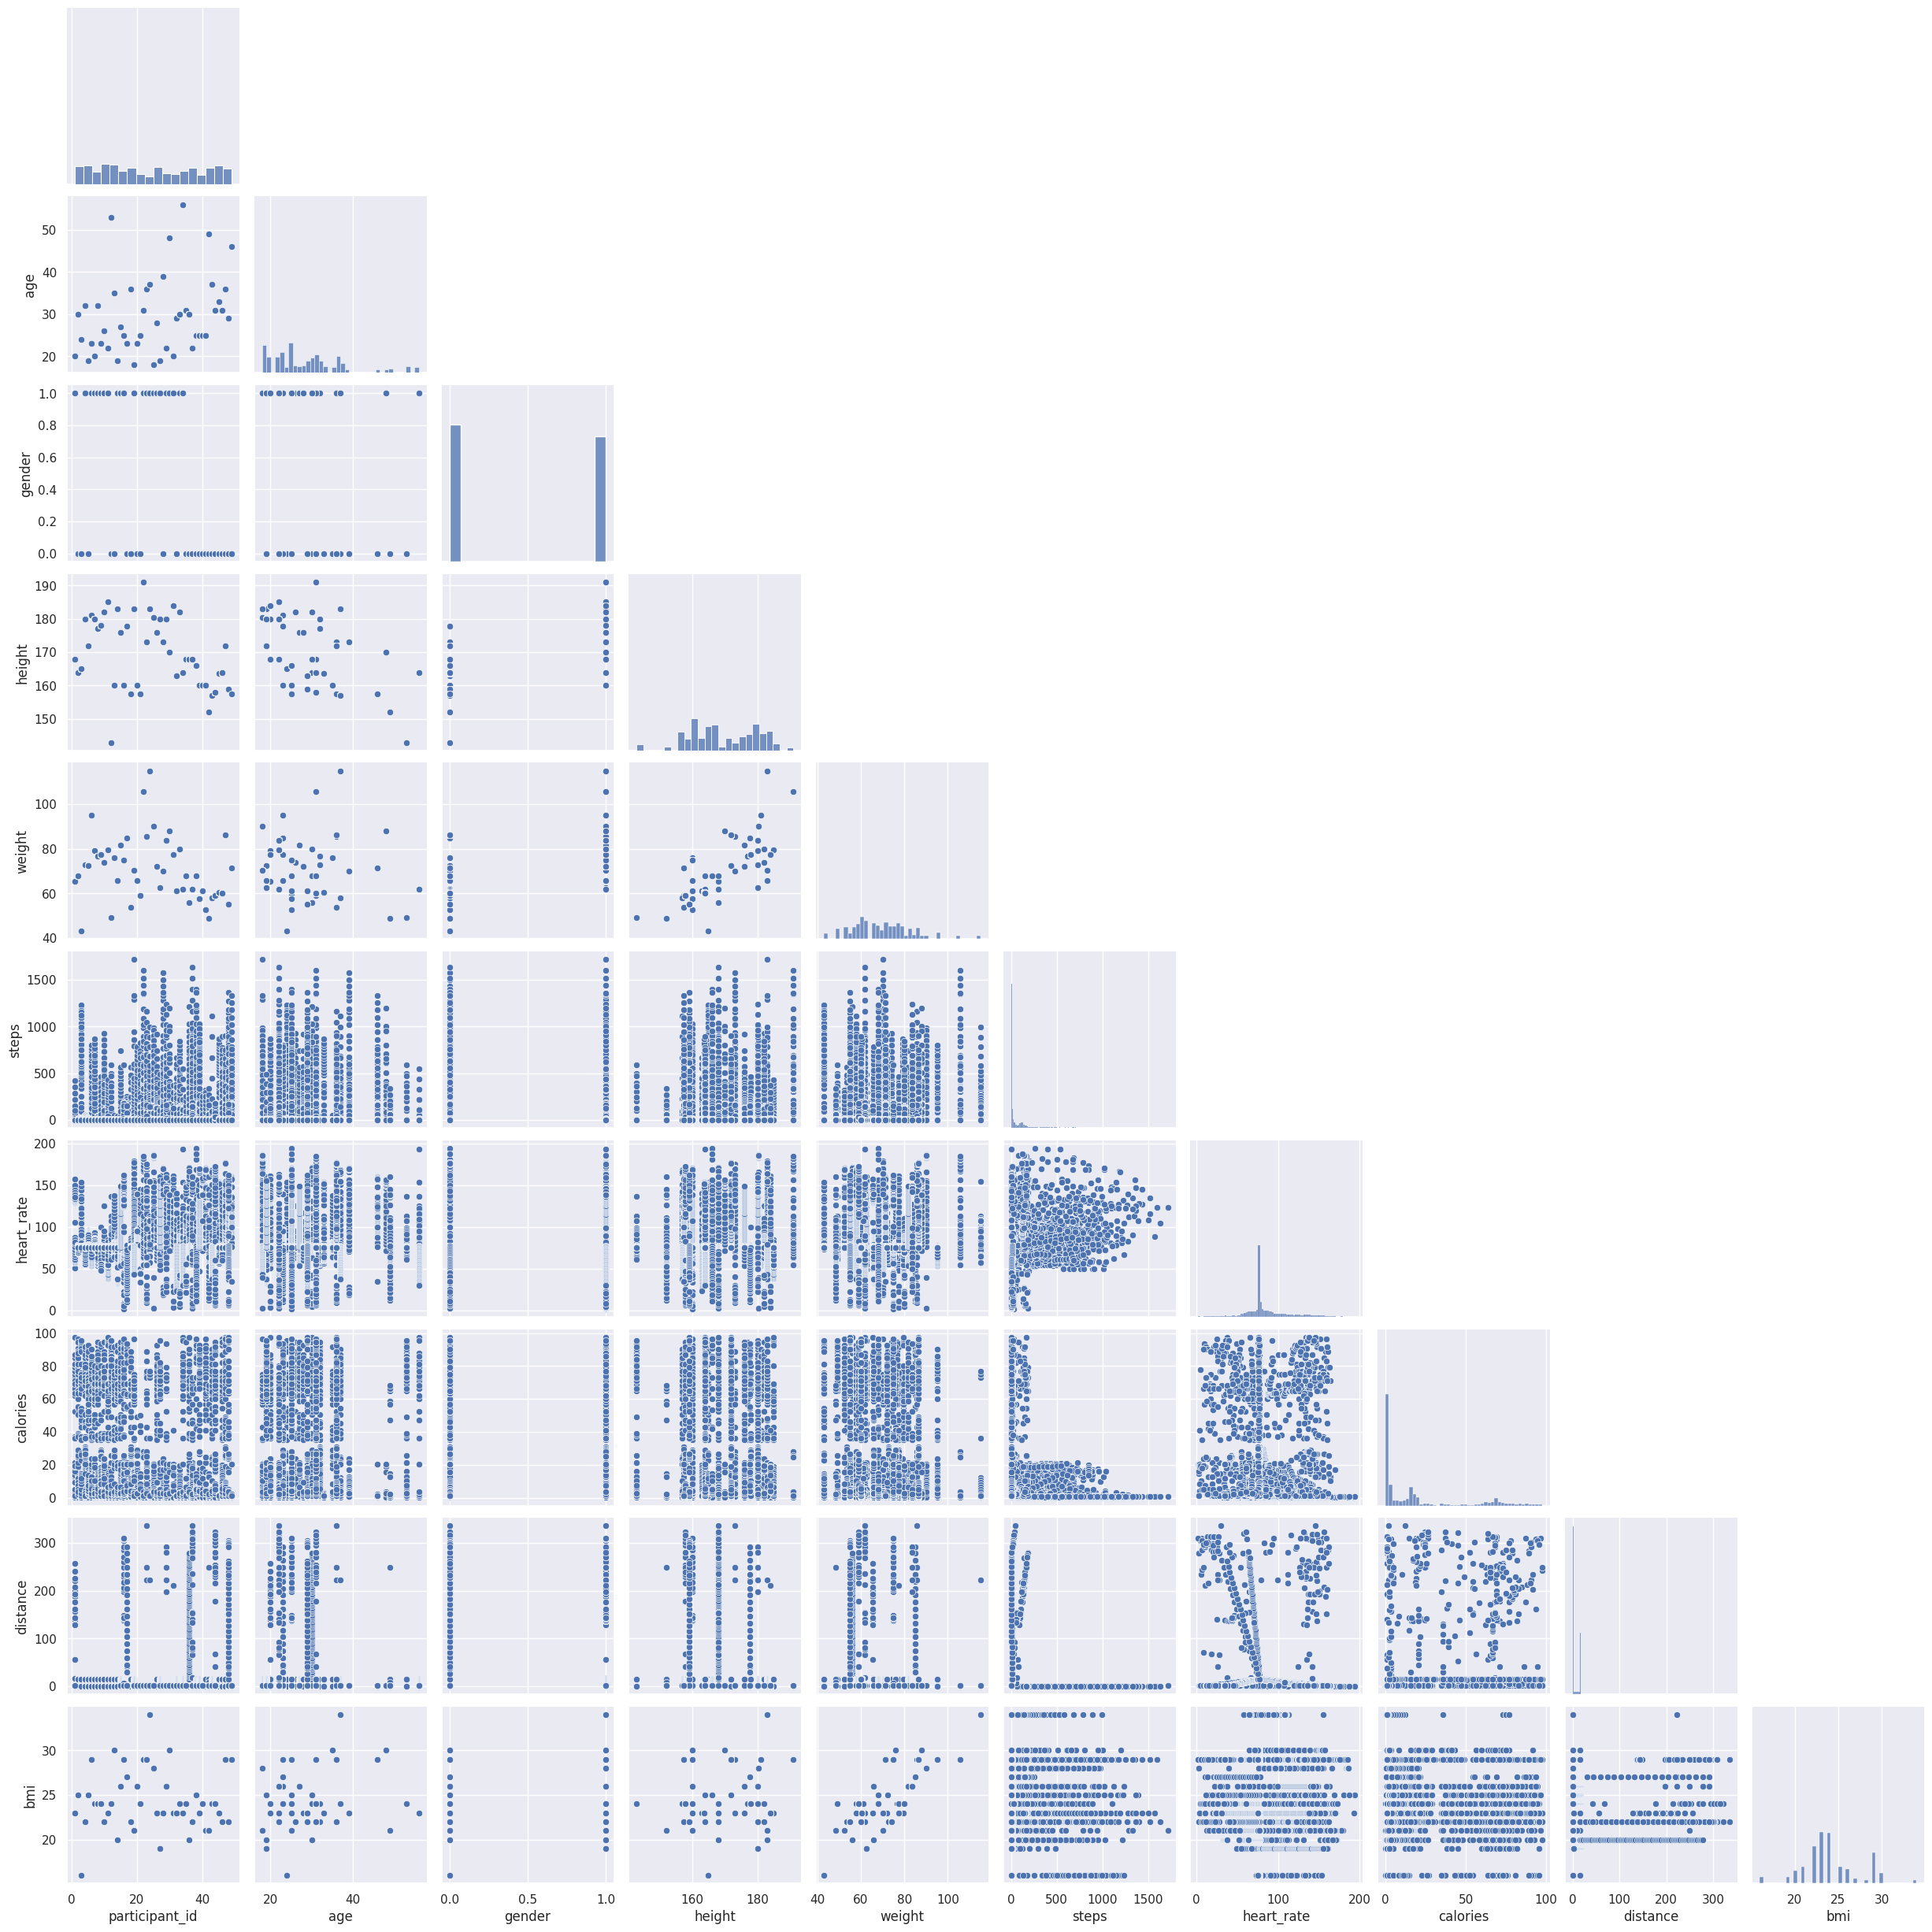

In [36]:
sns.pairplot(df1_core_features, corner = True)

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, 'participant_id'),
  Text(1, 0, 'age'),
  Text(2, 0, 'gender'),
  Text(3, 0, 'height'),
  Text(4, 0, 'weight'),
  Text(5, 0, 'steps'),
  Text(6, 0, 'heart_rate'),
  Text(7, 0, 'calories'),
  Text(8, 0, 'distance'),
  Text(9, 0, 'bmi')])

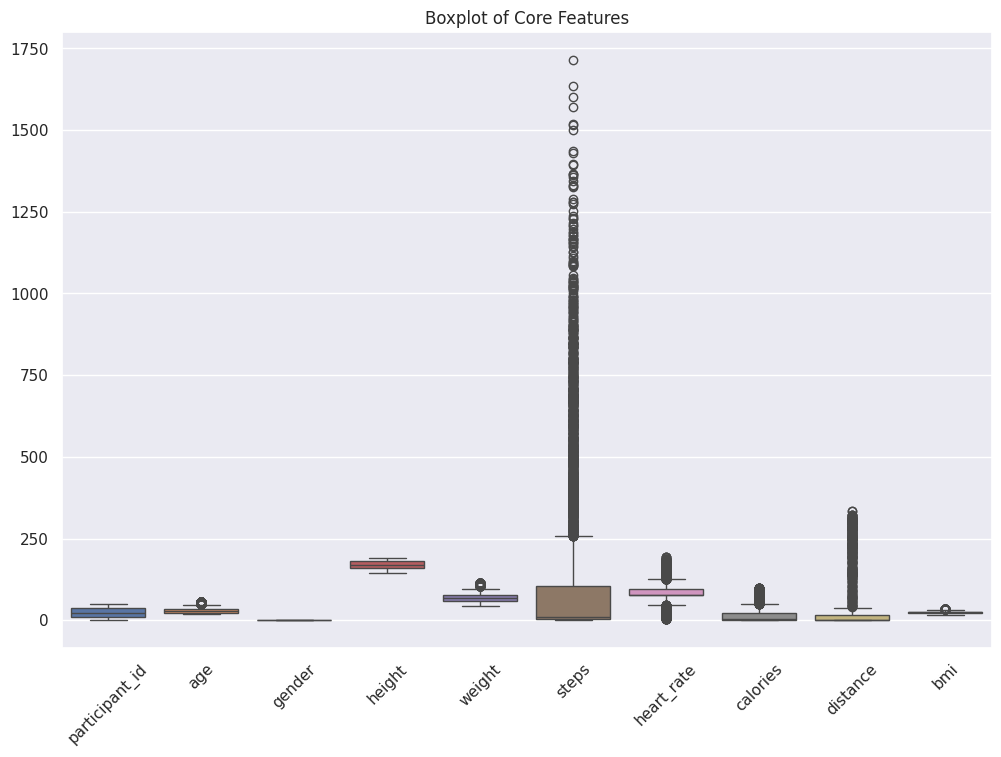

In [37]:
# Plotting boxplot for outliers
plt.figure(figsize=(12, 8))
sns.boxplot(data=df1_core_features)
plt.title('Boxplot of Core Features')
plt.xticks(rotation=45)

## Features and Target Split

In [38]:
df1_apple = df1[df1['device']=='apple watch']
df1_fitbit = df1[df1['device']=='fitbit']

In [39]:
df1_apple.shape

(3656, 20)

In [40]:
df1_fitbit.shape

(2608, 20)

In [41]:
X_apple = df1_apple.drop(columns = 'activity').drop(columns="device")
y_apple = df1_apple['activity']

X_fitbit = df1_fitbit.drop(columns = 'activity').drop(columns="device")
y_fitbit = df1_fitbit['activity']


## Lable Encoding of Target Value

In [42]:
from sklearn.preprocessing import LabelEncoder

In [43]:
y_apple.unique()

array(['Lying', 'Sitting', 'Self Pace walk', 'Running 3 METs',
       'Running 5 METs', 'Running 7 METs'], dtype=object)

In [44]:
label_encoder_apple = LabelEncoder()
label_encoder_apple.fit(y_apple)
y_apple_encoded = label_encoder_apple.transform(y_apple)

In [45]:
# Create a mapping between the original labels and their corresponding encoded labels using a dictionary.
le=label_encoder_apple.fit(y_apple)
le_name_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
le_name_mapping

{'Lying': 0,
 'Running 3 METs': 1,
 'Running 5 METs': 2,
 'Running 7 METs': 3,
 'Self Pace walk': 4,
 'Sitting': 5}

In [46]:
le_apple=label_encoder_apple.fit(df1_apple['activity'])
ac_df1_apple=le_apple.transform(df1_apple['activity'])
ac_df1_apple

array([0, 0, 0, ..., 3, 3, 3])

In [47]:
y_apple

0                Lying
1                Lying
2                Lying
3                Lying
4                Lying
             ...      
3651    Running 7 METs
3652    Running 7 METs
3653    Running 7 METs
3654    Running 7 METs
3655    Running 7 METs
Name: activity, Length: 3656, dtype: object

In [48]:
y_fitbit.unique()

array(['Lying', 'Self Pace walk', 'Running 3 METs', 'Running 5 METs',
       'Sitting', 'Running 7 METs'], dtype=object)

In [49]:
label_encoder_fitbit = LabelEncoder()
label_encoder_fitbit.fit(y_fitbit)
y_fitbit_encoded = label_encoder_fitbit.transform(y_fitbit)

## Features scaling

In [50]:
from sklearn.preprocessing import StandardScaler

In [51]:
scaler_apple = StandardScaler()
df_scaled_apple = pd.DataFrame(scaler_apple.fit_transform(X_apple),columns= scaler_apple.get_feature_names_out())
df_scaled_apple.head()

,participant_id,age,gender,height,weight,steps,heart_rate,calories,distance,entropy_heart,entropy_steps,resting_heart,corr_heart_steps,norm_heart,intensity_karvonen,sd_norm_heart,steps_times_distance,bmi
0,-1.695677,-1.0411,1.054549,-0.180264,-0.369017,-0.629081,-0.475505,-0.747423,-0.554538,0.453628,0.356003,-0.785936,1.340947,-0.139579,-0.258063,-0.778833,-0.352083,-0.400188
1,-1.695677,-1.0411,1.054549,-0.180264,-0.369017,-0.626468,-0.478417,-0.343014,-0.550378,0.453628,0.356003,-0.785936,1.340947,-0.142830,-0.260757,-0.778833,-0.351973,-0.400188
2,-1.695677,-1.0411,1.054549,-0.180264,-0.369017,-0.623855,-0.475149,0.508426,-0.546218,0.453628,0.356003,-0.785936,1.340947,-0.139181,-0.257734,-0.778833,-0.351856,-0.400188
3,-1.695677,-1.0411,1.054549,-0.180264,-0.369017,-0.621242,-0.471880,0.600567,-0.542057,0.453628,0.356003,-0.785936,1.340947,-0.135533,-0.254710,-0.778833,-0.351731,-0.400188
4,-1.695677,-1.0411,1.054549,-0.180264,-0.369017,-0.618629,-0.468611,0.692708,-0.537897,0.453628,0.356003,-0.785936,1.317761,-0.131884,-0.251686,-0.854109,-0.351600,-0.400188


In [52]:
scaler_fitbit = StandardScaler()
df_scaled_fitbit = pd.DataFrame(scaler_fitbit.fit_transform(X_fitbit),columns= scaler_fitbit.get_feature_names_out())
df_scaled_fitbit.head()

,participant_id,age,gender,height,weight,steps,heart_rate,calories,distance,entropy_heart,entropy_steps,resting_heart,corr_heart_steps,norm_heart,intensity_karvonen,sd_norm_heart,steps_times_distance,bmi
0,-1.443091,-1.010975,1.039108,-0.1445,-0.228768,-0.373905,1.787256,-1.142800,-0.482252,0.034291,-1.688549,2.322448,0.447976,-0.452279,-0.395318,-0.398064,-0.218929,-0.212811
1,-1.443091,-1.010975,1.039108,-0.1445,-0.228768,-0.373905,1.813474,-1.142800,-0.482252,0.034291,-1.688549,2.322448,0.447976,-0.428906,-0.341733,-0.398064,-0.218929,-0.212811
2,-1.443091,-1.010975,1.039108,-0.1445,-0.228768,-0.373905,1.716091,-1.142800,-0.482252,0.034291,-1.688549,2.322448,0.447976,-0.515718,-0.540761,-0.398064,-0.218929,-0.212811
3,-1.443091,-1.010975,1.039108,-0.1445,-0.228768,-0.373905,1.690942,-1.142800,-0.482252,0.034291,-1.688549,2.322448,0.447976,-0.538136,-0.592158,-0.398064,-0.218929,-0.212811
4,-1.443091,-1.010975,1.039108,-0.1445,-0.228768,-0.373905,1.873403,-1.066937,-0.482252,0.034291,-1.688549,2.322448,-2.006431,-0.375484,-0.219255,-0.373966,-0.218929,-0.212811


## Train-Split Data(Apple and Fitbit)

In [53]:
from sklearn.model_selection import train_test_split

In [54]:
X_train_apple, X_test_apple, y_train_apple, y_test_apple = train_test_split(df_scaled_apple, y_apple_encoded, test_size=0.2, random_state=42)

In [55]:
X_train_fitbit, X_test_fitbit, y_train_fitbit, y_test_fitbit = train_test_split(df_scaled_fitbit, y_fitbit_encoded, test_size=0.2, random_state=42)

# Predictive model

## Decision Tree Classifier (Apple)

In [56]:
from sklearn.tree import DecisionTreeClassifier
dt_model = DecisionTreeClassifier(random_state=0)

In [57]:
# Train the model
dt_model.fit(X_train_apple, y_train_apple)

DecisionTreeClassifier(random_state=0)

In [58]:
# Prediction
y_apple_pred_dt = dt_model.predict(X_test_apple)

In [59]:
accuracy_score(y_test_apple, y_apple_pred_dt)

0.73224043715847

## Decision Tree Classifier (Fitbit)

In [60]:
from sklearn.tree import DecisionTreeClassifier
dt_model2 = DecisionTreeClassifier(random_state=0)

In [61]:
# Train the model
dt_model2.fit(X_train_fitbit, y_train_fitbit)

DecisionTreeClassifier(random_state=0)

In [62]:
# Prediction
y_fitbit_pred_dt = dt_model2.predict(X_test_fitbit)

In [63]:
accuracy_score(y_test_fitbit, y_fitbit_pred_dt)

0.8505747126436781

## K-NN(Apple)

In [64]:
from sklearn.neighbors import KNeighborsClassifier
knn_model = KNeighborsClassifier(n_neighbors=3)

In [65]:
# Train the model
knn_model.fit(X_train_apple, y_train_apple)

KNeighborsClassifier(n_neighbors=3)

In [66]:
# Prediction
y_apple_pred_knn = knn_model.predict(X_test_apple)

In [67]:
accuracy_score(y_test_apple, y_apple_pred_knn)

0.75

## K-NN(Fitbit)

In [68]:
knn_model2 = KNeighborsClassifier(n_neighbors=3)

In [69]:
# Train the model
knn_model2.fit(X_train_fitbit, y_train_fitbit)

KNeighborsClassifier(n_neighbors=3)

In [70]:
# Prediction
y_fitbit_pred_knn = knn_model2.predict(X_test_fitbit)

In [71]:
accuracy_score(y_test_fitbit, y_fitbit_pred_knn)

0.7394636015325671

## Random Forest(Apple)

In [72]:
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=0)

In [73]:
# Train the model
rf_model.fit(X_train_apple, y_train_apple)

RandomForestClassifier(random_state=0)

In [74]:
# Prediction
y_apple_pred_rf = rf_model.predict(X_test_apple)

In [75]:
accuracy_score(y_test_apple, y_apple_pred_rf)

0.842896174863388

## Random Forest(Fitbit)

In [76]:
rf_model2 = RandomForestClassifier(n_estimators=100, random_state=0)

In [77]:
# Train the model
rf_model2.fit(X_train_fitbit, y_train_fitbit)

RandomForestClassifier(random_state=0)

In [78]:
# Prediction
y_fitbit_pred_rf = rf_model2.predict(X_test_fitbit)

In [79]:
accuracy_score(y_test_fitbit, y_fitbit_pred_rf)

0.9003831417624522

## Logistic Regression(Apple)

In [80]:
from sklearn.linear_model import LogisticRegression
lr_model = LogisticRegression(random_state = 0, penalty = 'l2')

In [81]:
# Train the model
lr_model.fit(X_train_apple, y_train_apple)

LogisticRegression(random_state=0)

In [82]:
# Prediction
y_apple_pred_lr = lr_model.predict(X_test_apple)

In [83]:
accuracy_score(y_test_apple, y_apple_pred_lr)

0.3620218579234973

## Logistic Regression(Fitbit)

In [84]:
lr_model2 = LogisticRegression(random_state = 0, penalty = 'l2')

In [85]:
# Train the model
lr_model2.fit(X_train_fitbit, y_train_fitbit)

LogisticRegression(random_state=0)

In [86]:
# Prediction
y_fitbit_pred_lr = lr_model2.predict(X_test_fitbit)

In [87]:
accuracy_score(y_test_fitbit, y_fitbit_pred_lr)

0.421455938697318

## Define most relevant features(Apple)

In [88]:
from sklearn.feature_selection import SelectFromModel


In [89]:
# Get the feature importances from the Random Forest model
feature_importances = rf_model.feature_importances_

In [90]:
# Create a DataFrame with feature names and their importances
feature_importance_df = pd.DataFrame({'Feature': X_train_apple.columns, 'Importance': feature_importances})

# Sort the features by importance in descending order
top_features = feature_importance_df.sort_values(by='Importance', ascending=False).head(10)

In [91]:
print(top_features)

                 Feature  Importance
13            norm_heart    0.098663
6             heart_rate    0.093461
15         sd_norm_heart    0.091418
7               calories    0.089626
14    intensity_karvonen    0.088860
8               distance    0.078218
12      corr_heart_steps    0.078189
5                  steps    0.077086
16  steps_times_distance    0.070824
0         participant_id    0.046434


## Define most relevant features(Fitbit)

In [92]:
# Get the feature importances from the Random Forest model
feature_importances = rf_model2.feature_importances_

In [93]:
# Create a DataFrame with feature names and their importances
feature_importance_df = pd.DataFrame({'Feature': X_train_fitbit.columns, 'Importance': feature_importances})

# Sort the features by importance in descending order
top_features = feature_importance_df.sort_values(by='Importance', ascending=False).head(10)

In [94]:
print(top_features)

                 Feature  Importance
7               calories    0.161413
5                  steps    0.145834
13            norm_heart    0.109821
16  steps_times_distance    0.108934
8               distance    0.093385
14    intensity_karvonen    0.087555
6             heart_rate    0.083431
15         sd_norm_heart    0.048549
12      corr_heart_steps    0.026108
10         entropy_steps    0.025834


# Predictive Model with core features

In [95]:
core_col = df1_core_features.columns[1:]
core_col

Index(['age', 'gender', 'height', 'weight', 'steps', 'heart_rate', 'calories',
       'distance', 'bmi'],
      dtype='object')

In [96]:
X_train_apple, X_test_apple, y_train_apple, y_test_apple = train_test_split(df_scaled_apple[core_col], y_apple_encoded, test_size=0.2, random_state=42)

In [97]:
X_train_fitbit, X_test_fitbit, y_train_fitbit, y_test_fitbit = train_test_split(df_scaled_fitbit[core_col], y_fitbit_encoded, test_size=0.2, random_state=42)

([0, 1, 2, 3, 4, 5, 6, 7],
 [Text(0, 0, 'age'),
  Text(1, 0, 'height'),
  Text(2, 0, 'weight'),
  Text(3, 0, 'steps'),
  Text(4, 0, 'heart_rate'),
  Text(5, 0, 'calories'),
  Text(6, 0, 'distance'),
  Text(7, 0, 'bmi')])

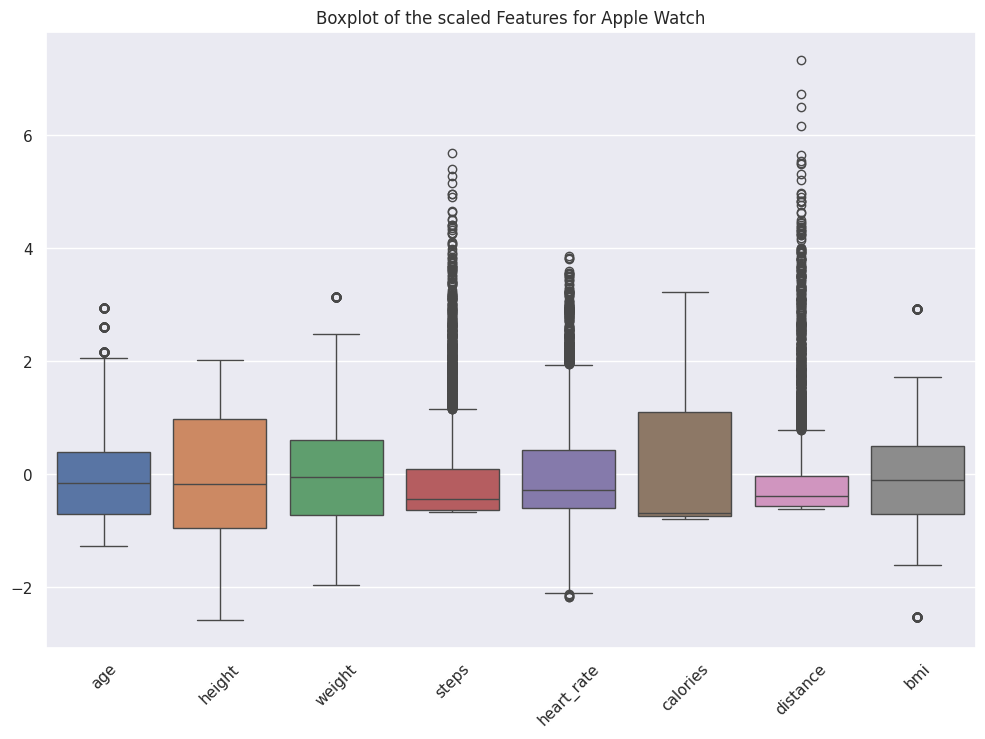

In [98]:
# Plotting boxplot for outliers
plt.figure(figsize=(12, 8))
sns.boxplot(data=df_scaled_apple[core_col].drop(columns='gender'))
plt.title('Boxplot of the scaled Features for Apple Watch')
plt.xticks(rotation=45)

In [99]:
print(len(df1_apple['steps']))
print(len(df1_apple['distance']))

3656
3656


In [100]:
# Create a simple Python function pandas.quantile() function, that takes in our column from the dataframe and outputs the outliers:
data=df_scaled_apple[core_col].drop(columns='gender')
#create a function to find outliers using IQR
def find_outliers_IQR(data):
    q1=data.quantile(0.25)
    q3=data.quantile(0.75)
    IQR=q3-q1
    outliers = data[((data<(q1-1.5*IQR)) | (data>(q3+1.5*IQR)))]
    return outliers
# Using .quantile() we can define Q1 and Q3. Next we calculate IQR,
# then we use the values to find the outliers in the dataframe.
# First run 'steps' through the function to return a series of the outliers.
ol_apple_steps = find_outliers_IQR(data['steps'])
ol_apple_distance = find_outliers_IQR(data['distance'])

# Count outliers
num_ol_apple_steps = len(ol_apple_steps)
num_ol_apple_distance = len(ol_apple_distance)
# Calculate percentage of outliers
percnt_ol_apple_steps = (num_ol_apple_steps / len(df1_apple['steps'])) * 100
percnt_ol_apple_distance = (num_ol_apple_distance / len(df1_apple['distance'])) * 100

In [101]:
print('number of outliers for the scaled feature "steps" for Apple Watch: '+ str(len(ol_apple_steps)))
print('max outlier value: '+ str(ol_apple_steps.max()))
print('min outlier value: '+ str(ol_apple_steps.min()))

print('number of outliers for the scaled feature "distance" for Apple Watch: '+ str(len(ol_apple_distance)))
print('max outlier value: '+ str(ol_apple_distance.max()))
print('min outlier value: '+ str(ol_apple_distance.min()))

print("Percentage of outliers for Apple Watch scaled feature 'steps':", percnt_ol_apple_steps)
print("Percentage of outliers for Apple Watch scaled feature 'distance':", percnt_ol_apple_distance)

number of outliers for the scaled feature "steps" for Apple Watch: 487
max outlier value: 5.693197895236841
min outlier value: 1.1600155433777393
number of outliers for the scaled feature "distance" for Apple Watch: 499
max outlier value: 7.331296391578715
min outlier value: 0.7777759503214899
Percentage of outliers for Apple Watch scaled feature 'steps': 13.320568927789934
Percentage of outliers for Apple Watch scaled feature 'distance': 13.648796498905908


Since the percentage of outliers for both the features, i.e. 'steps' and 'distance' is less than 80%, no need to drop the outliers in this case

([0, 1, 2, 3, 4, 5, 6, 7],
 [Text(0, 0, 'age'),
  Text(1, 0, 'height'),
  Text(2, 0, 'weight'),
  Text(3, 0, 'steps'),
  Text(4, 0, 'heart_rate'),
  Text(5, 0, 'calories'),
  Text(6, 0, 'distance'),
  Text(7, 0, 'bmi')])

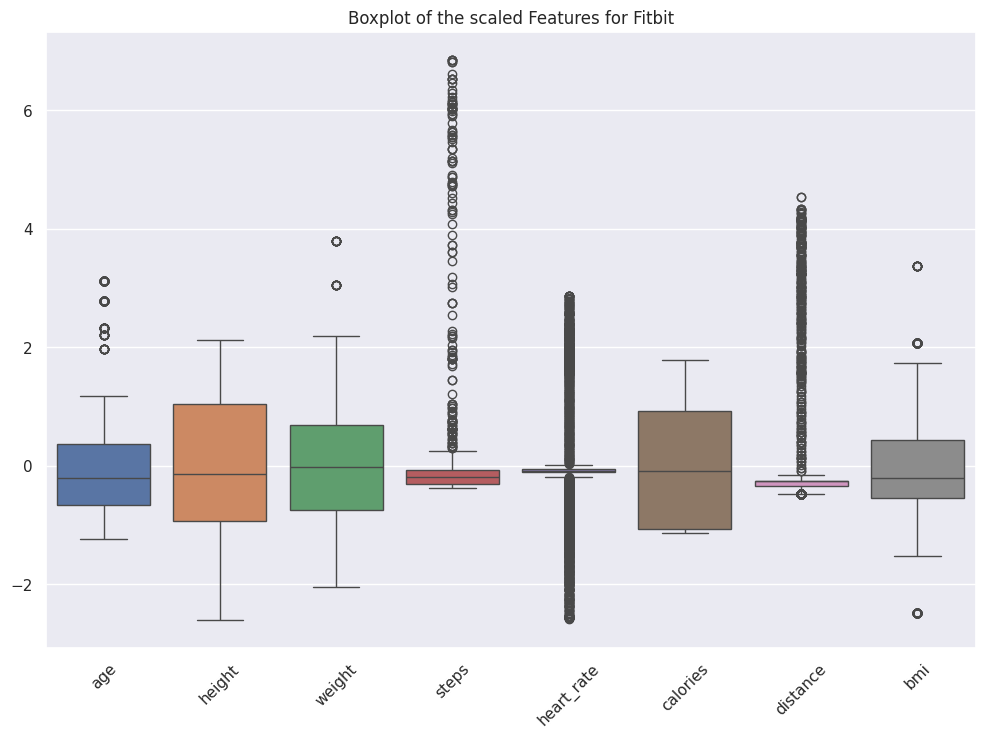

In [102]:
# Plotting boxplot for outliers
plt.figure(figsize=(12, 8))
sns.boxplot(data=df_scaled_fitbit[core_col].drop(columns='gender'))
plt.title('Boxplot of the scaled Features for Fitbit')
plt.xticks(rotation=45)

In [103]:
print(len(df1_apple['steps']))
print(len(df1_apple['distance']))

3656
3656


In [104]:
# Create a simple Python function pandas.quantile() function, that takes in our column from the dataframe and outputs the outliers:
data=df_scaled_fitbit[core_col].drop(columns='gender')
#create a function to find outliers using IQR
def find_outliers_IQR(data):
    q1=data.quantile(0.25)
    q3=data.quantile(0.75)
    IQR=q3-q1
    outliers = data[((data<(q1-1.5*IQR)) | (data>(q3+1.5*IQR)))]
    return outliers
# Using .quantile() we can define Q1 and Q3. Next we calculate IQR,
# then we use the values to find the outliers in the dataframe.
# First run 'steps' through the function to return a series of the outliers.
ol_fitbit_steps = find_outliers_IQR(data['steps'])
ol_fitbit_distance = find_outliers_IQR(data['distance'])

# Count outliers
num_ol_fitbit_steps = len(ol_fitbit_steps)
num_ol_fitbit_distance = len(ol_fitbit_distance)
# Calculate percentage of outliers
percnt_ol_fitbit_steps = (num_ol_fitbit_steps / len(df1_fitbit['steps'])) * 100
percnt_ol_fitbit_distance = (num_ol_apple_distance / len(df1_fitbit['distance'])) * 100

In [105]:
print('number of outliers for the scaled feature "steps" for Fitbit: '+ str(len(ol_fitbit_steps)))
print('max outlier value: '+ str(ol_fitbit_steps.max()))
print('min outlier value: '+ str(ol_fitbit_steps.min()))

print('number of outliers for the scaled feature "distance" for Fitbit: '+ str(len(ol_fitbit_distance)))
print('max outlier value: '+ str(ol_fitbit_distance.max()))
print('min outlier value: '+ str(ol_fitbit_distance.min()))

print("Percentage of outliers for Fitbit scaled feature 'steps':", percnt_ol_fitbit_steps)
print("Percentage of outliers for Fitbit scaled feature 'distance':", percnt_ol_fitbit_distance)

number of outliers for the scaled feature "steps" for Fitbit: 151
max outlier value: 6.848179299358929
min outlier value: 0.2969989351815831
number of outliers for the scaled feature "distance" for Fitbit: 636
max outlier value: 4.534714625364853
min outlier value: -0.4822522673772759
Percentage of outliers for Fitbit scaled feature 'steps': 5.7898773006134965
Percentage of outliers for Fitbit scaled feature 'distance': 19.133435582822088


## Decision Tree Classifier (Apple)

In [106]:
from sklearn.tree import DecisionTreeClassifier
dt_model = DecisionTreeClassifier(random_state=0)
dt_model.fit(X_train_apple, y_train_apple)
y_apple_pred_dt = dt_model.predict(X_test_apple)

In [107]:
accuracy_score(y_test_apple, y_apple_pred_dt)

0.7117486338797814

## Decision Tree Classifier (Fitbit)

In [108]:
from sklearn.tree import DecisionTreeClassifier
dt_model2 = DecisionTreeClassifier(random_state=0)
dt_model2.fit(X_train_fitbit, y_train_fitbit)
y_fitbit_pred_dt = dt_model2.predict(X_test_fitbit)

In [109]:
accuracy_score(y_test_fitbit, y_fitbit_pred_dt)

0.8467432950191571

## K-NN(Apple)

In [110]:
from sklearn.neighbors import KNeighborsClassifier
knn_model = KNeighborsClassifier(n_neighbors=3)
knn_model.fit(X_train_apple, y_train_apple)
y_apple_pred_knn = knn_model.predict(X_test_apple)

accuracy_score(y_test_apple, y_apple_pred_knn)

0.7103825136612022

## K-NN(Fitbit)

In [111]:
knn_model2 = KNeighborsClassifier(n_neighbors=3)
knn_model2.fit(X_train_fitbit, y_train_fitbit)
y_fitbit_pred_knn = knn_model2.predict(X_test_fitbit)

accuracy_score(y_test_fitbit, y_fitbit_pred_knn)

0.7183908045977011

## Random Forest(Apple)

In [112]:
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=0)
rf_model.fit(X_train_apple, y_train_apple)
y_apple_pred_rf = rf_model.predict(X_test_apple)

accuracy_score(y_test_apple, y_apple_pred_rf)

0.8210382513661202

## Random Forest(Fitbit)

In [113]:
rf_model2 = RandomForestClassifier(n_estimators=100, random_state=0)
rf_model2.fit(X_train_fitbit, y_train_fitbit)
y_fitbit_pred_rf = rf_model2.predict(X_test_fitbit)

accuracy_score(y_test_fitbit, y_fitbit_pred_rf)

0.8716475095785441

## Logistic Regression(Apple)

In [114]:
from sklearn.linear_model import LogisticRegression
lr_model = LogisticRegression(random_state = 0, penalty = 'l2')
lr_model.fit(X_train_apple, y_train_apple)
y_apple_pred_lr = lr_model.predict(X_test_apple)

accuracy_score(y_test_apple, y_apple_pred_lr)

0.29918032786885246

## Logistic Regression(Fitbit)

In [115]:
lr_model2 = LogisticRegression(random_state = 0, penalty = 'l2')
lr_model2.fit(X_train_fitbit, y_train_fitbit)
y_fitbit_pred_lr = lr_model2.predict(X_test_fitbit)

accuracy_score(y_test_fitbit, y_fitbit_pred_lr)

0.3448275862068966

## Define most relevant features(Apple)

In [116]:
from sklearn.feature_selection import SelectFromModel


In [117]:
# Get the feature importances from the Random Forest model
feature_importances = rf_model.feature_importances_

In [118]:
# Create a DataFrame with feature names and their importances
feature_importance_df = pd.DataFrame({'Feature': X_train_apple.columns, 'Importance': feature_importances})

# Sort the features by importance in descending order
top_features = feature_importance_df.sort_values(by='Importance', ascending=False).head(10)

In [119]:
print(top_features)

      Feature  Importance
5  heart_rate    0.228181
4       steps    0.179506
7    distance    0.175420
6    calories    0.169547
3      weight    0.066827
0         age    0.060340
2      height    0.058539
8         bmi    0.049341
1      gender    0.012300


## Define most relevant features(Fitbit)

In [120]:
# Get the feature importances from the Random Forest model
feature_importances = rf_model2.feature_importances_

In [121]:
# Create a DataFrame with feature names and their importances
feature_importance_df = pd.DataFrame({'Feature': X_train_fitbit.columns, 'Importance': feature_importances})

# Sort the features by importance in descending order
top_features = feature_importance_df.sort_values(by='Importance', ascending=False).head(10)

In [122]:
print(top_features)

      Feature  Importance
4       steps    0.271779
6    calories    0.226698
5  heart_rate    0.187838
7    distance    0.183680
3      weight    0.034085
2      height    0.032705
0         age    0.031587
8         bmi    0.025265
1      gender    0.006363


# Use of Shapley values to explain individual predictions and to interpret the importance of features in our model 

View the feature importance and confusion matrix to get a basic impression of the model just to understand where we stand with the feature importance

# Feature Importances -Apple Watch and Fitbit

Text(0.5, 0, 'Relative Importance')

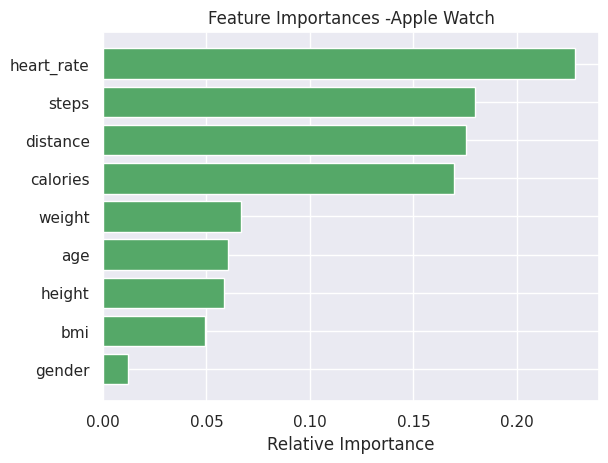

In [123]:
# For Apple Watch
importances = rf_model.feature_importances_
indices = np.argsort(importances)
# features = df1_apple.columns
features = X_test_apple.columns
plt.title('Feature Importances -Apple Watch')
plt.barh(range(len(indices)), importances[indices], color='g', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')

The above Feature Importances plot shows that 'heart_rate', 'steps' and 'distance' are the most important features for Apple Watch 

Text(0.5, 0, 'Relative Importance')

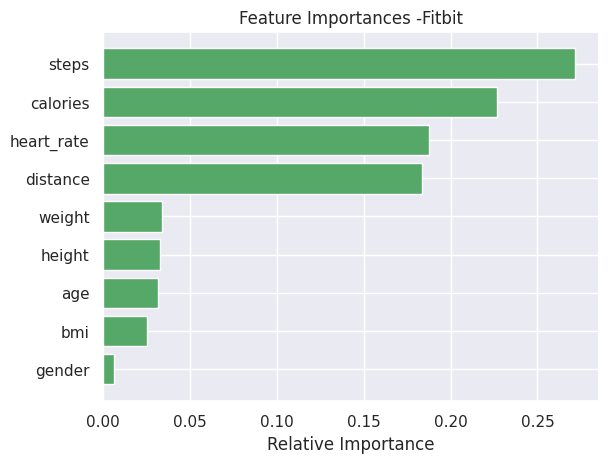

In [124]:
# For Fitbit
importances = rf_model2.feature_importances_
indices = np.argsort(importances)
#features = df1_fitbit.columns
features = X_test_fitbit.columns
plt.title('Feature Importances -Fitbit')
plt.barh(range(len(indices)), importances[indices], color='g', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')

The above Feature Importances plot shows that 'steps', 'calories' and 'heart_rate' are the most important features for Fitbit

# Confusion matrix - Apple Watch and Fitbit
to visualize the performance of my model and more important to see where the model fails exactly

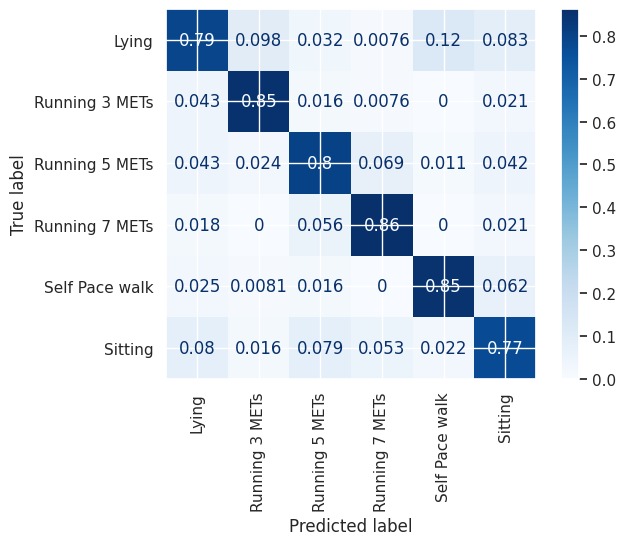

In [125]:
# Compute the Normalized confusion matrix for Apple Watch
cm_apple = confusion_matrix(y_test_apple, y_apple_pred_rf, normalize='pred')

class_names = ['Lying', 'Running 3 METs', 'Running 5 METs', 'Running 7 METs', 'Self Pace walk', 'Sitting']

# Create ConfusionMatrixDisplay object
cm_display_apple = ConfusionMatrixDisplay(confusion_matrix=cm_apple, display_labels=class_names)

# Plot confusion matrix using ConfusionMatrixDisplay
cm_display_apple.plot(cmap=plt.cm.Blues, xticks_rotation='vertical')

[Text(0, 0.5, 'Lying'),
 Text(0, 1.5, 'Running 3 METs'),
 Text(0, 2.5, 'Running 5 METs'),
 Text(0, 3.5, 'Running 7 METs'),
 Text(0, 4.5, 'Self Pace walk'),
 Text(0, 5.5, 'Sitting')]

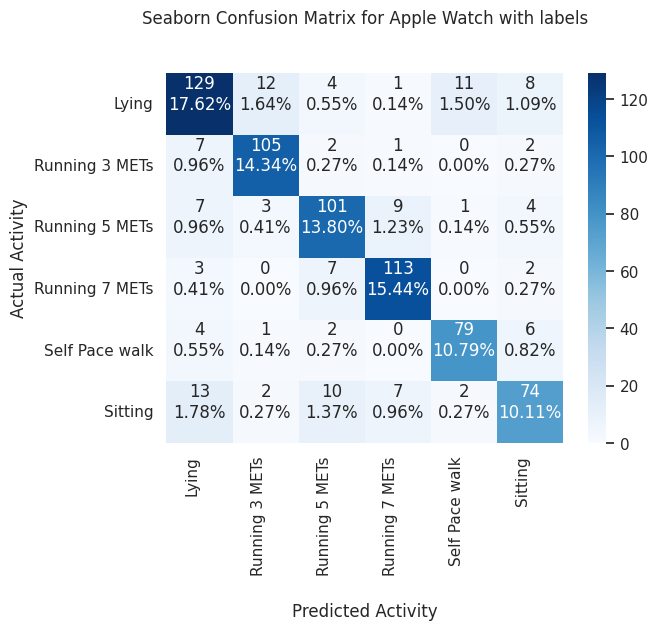

In [126]:
# Plot Confusion Matrix For Apple Watch With Numbers And Percentages
cm_apple = confusion_matrix(y_test_apple, y_apple_pred_rf)
class_names = ['Lying', 'Running 3 METs', 'Running 5 METs', 'Running 7 METs', 'Self Pace walk', 'Sitting']
group_counts_apple= ["{0:0.0f}".format(value) for value in
                cm_apple.flatten()]
# calculate the percentage of True Positives, False Positives, False Negatives,
# and True negatives - cf_matrix/np.sum(cf_matrix)

group_percent_apple = ["{0:.2%}".format(value) for value in
                     cm_apple.flatten()/np.sum(cm_apple)]

labels = [f"{v1}\n{v2}\n" for v1, v2 in
          zip(group_counts_apple,group_percent_apple)]

labels = np.asarray(labels).reshape(6,6)

ax = sns.heatmap(cm_apple, annot=labels, fmt='', cmap='Blues')

ax.set_title('Seaborn Confusion Matrix for Apple Watch with labels\n\n');
ax.set_xlabel('\nPredicted Activity')
ax.set_ylabel('Actual Activity');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(class_names, rotation='vertical', ha='right')
ax.yaxis.set_ticklabels(class_names, rotation=0)

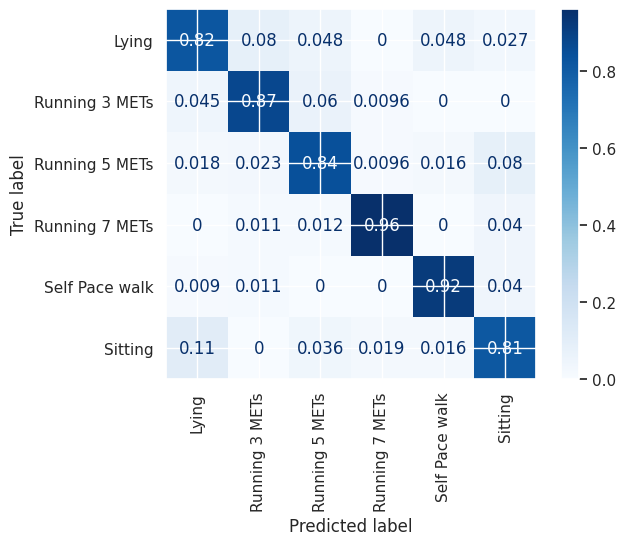

In [127]:
# Compute the Normalized confusion matrix for Fitbit
cm_fitbit = confusion_matrix(y_test_fitbit, y_fitbit_pred_rf, normalize='pred')

class_names = ['Lying', 'Running 3 METs', 'Running 5 METs', 'Running 7 METs', 'Self Pace walk', 'Sitting']

# Create ConfusionMatrixDisplay object
cm_display_fitbit = ConfusionMatrixDisplay(confusion_matrix=cm_fitbit, display_labels=class_names)

# Plot confusion matrix using ConfusionMatrixDisplay
cm_display_fitbit.plot(cmap=plt.cm.Blues, xticks_rotation='vertical')

[Text(0, 0.5, 'Lying'),
 Text(0, 1.5, 'Running 3 METs'),
 Text(0, 2.5, 'Running 5 METs'),
 Text(0, 3.5, 'Running 7 METs'),
 Text(0, 4.5, 'Self Pace walk'),
 Text(0, 5.5, 'Sitting')]

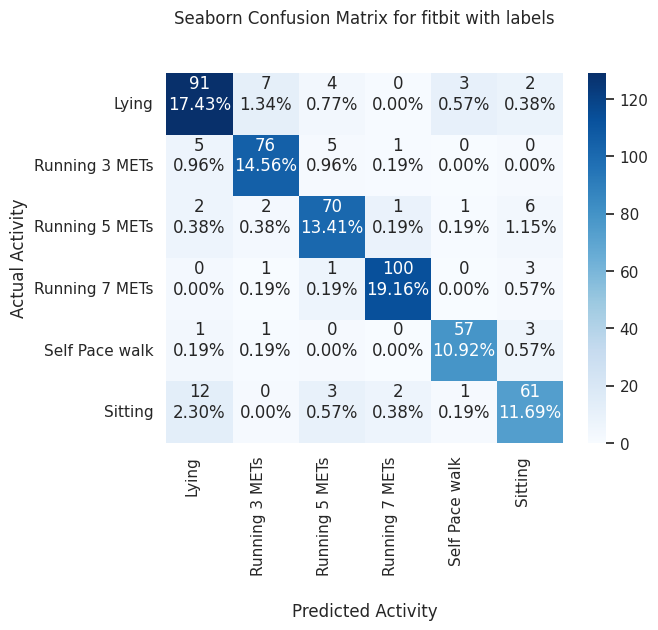

In [128]:
# Plot Confusion Matrix For Fitbit With Numbers And Percentages
cm_fitbit = confusion_matrix(y_test_fitbit, y_fitbit_pred_rf)
class_names = ['Lying', 'Running 3 METs', 'Running 5 METs', 'Running 7 METs', 'Self Pace walk', 'Sitting']
group_counts_fitbit= ["{0:0.0f}".format(value) for value in
                cm_fitbit.flatten()]
# calculate the percentage of True Positives, False Positives, False Negatives,
# and True negatives - cf_matrix/np.sum(cf_matrix)

group_percent_fitbit = ["{0:.2%}".format(value) for value in
                     cm_fitbit.flatten()/np.sum(cm_fitbit)]

labels = [f"{v1}\n{v2}\n" for v1, v2 in
          zip(group_counts_fitbit,group_percent_fitbit)]

labels = np.asarray(labels).reshape(6,6)

ax = sns.heatmap(cm_apple, annot=labels, fmt='', cmap='Blues')

ax.set_title('Seaborn Confusion Matrix for fitbit with labels\n\n');
ax.set_xlabel('\nPredicted Activity')
ax.set_ylabel('Actual Activity');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(class_names, rotation='vertical', ha='right')
ax.yaxis.set_ticklabels(class_names, rotation=0)

In [129]:
# Calculate the F1 Score for each class for Apple Watch
from sklearn.metrics import classification_report
print('\nClassification Report Apple Watch\n')
print(classification_report(y_test_apple, y_apple_pred_rf))


Classification Report Apple Watch

              precision    recall  f1-score   support

           0       0.79      0.78      0.79       165
           1       0.85      0.90      0.88       117
           2       0.80      0.81      0.80       125
           3       0.86      0.90      0.88       125
           4       0.85      0.86      0.85        92
           5       0.77      0.69      0.73       108

    accuracy                           0.82       732
   macro avg       0.82      0.82      0.82       732
weighted avg       0.82      0.82      0.82       732



In [130]:
# Calculate the F1 Score for each class for Fitbit
from sklearn.metrics import classification_report
print('\nClassification Report Fitbit\n')
print(classification_report(y_test_fitbit, y_fitbit_pred_rf))


Classification Report Fitbit

              precision    recall  f1-score   support

           0       0.82      0.85      0.83       107
           1       0.87      0.87      0.87        87
           2       0.84      0.85      0.85        82
           3       0.96      0.95      0.96       105
           4       0.92      0.92      0.92        62
           5       0.81      0.77      0.79        79

    accuracy                           0.87       522
   macro avg       0.87      0.87      0.87       522
weighted avg       0.87      0.87      0.87       522



# SHAP Summary Plot with Core Features - Apple Watch and Fitbit

In [131]:
# compute SHAP values for Apple Watch
explainer = shap.TreeExplainer(rf_model)
shap_values_apple = explainer.shap_values(X_test_apple)

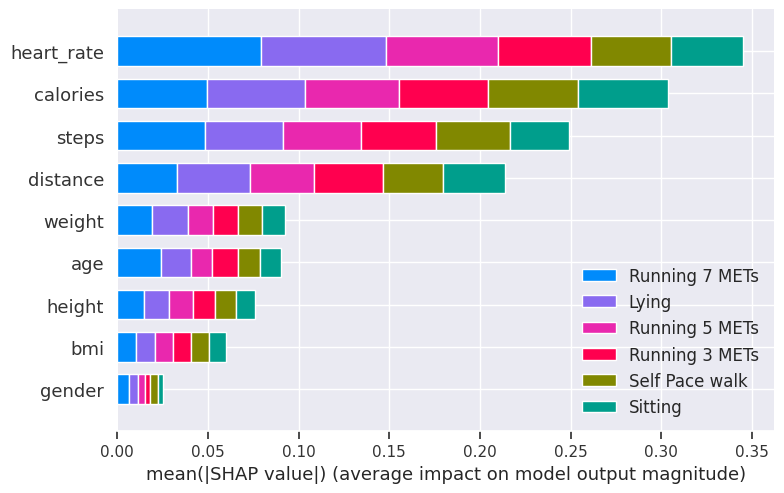

In [132]:
# Now we can plot relevant plots that will help us analyze the model for Apple Watch
shap.summary_plot(shap_values_apple, X_test_apple.values, plot_type="bar", class_names= class_names, feature_names = X_test_apple.columns)

1. In the above summary plot for Apple Watch, the impact of a feature on the classes is stacked to create the feature importance plot. 
2. The plot shows us what the machine managed to learn from the features.

In [133]:
# compute SHAP values for Fitbit
explainer = shap.TreeExplainer(rf_model2)
shap_values_fitbit = explainer.shap_values(X_test_fitbit)

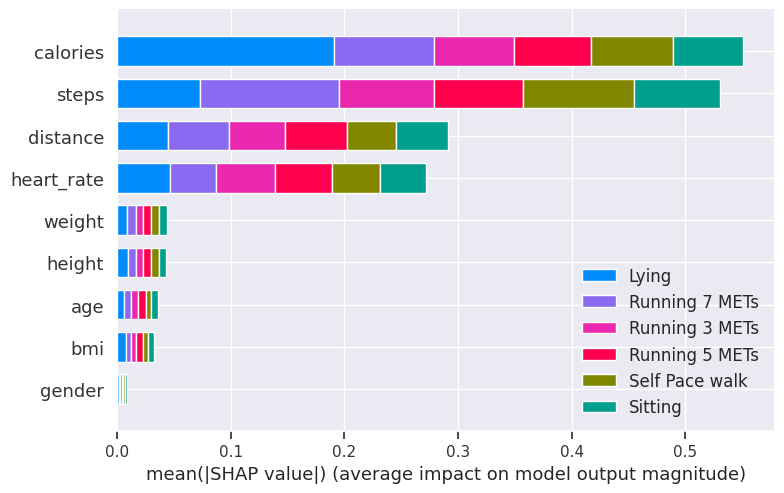

In [134]:
# Now we can plot relevant plots that will help us analyze the model for Fitbit
shap.summary_plot(shap_values_fitbit, X_test_fitbit.values, plot_type="bar", class_names= class_names, feature_names = X_test_fitbit.columns)

3. The summary plots for Apple watch and Fitbit show the feature importance of each feature in the model. 
2. The features are ordered by how much they influenced the model’s prediction.
3. The x-axis stands for the average of the absolute SHAP value of each feature.
3. The results show that “heart_rate” is the most important feature, followed by “Steps” and “distance” which play major roles in determining the results for Apple watch.
4. However, 'steps' is the most important feature, followed by 'calories' and 'heart_rate' which play major roles in determining the results for Fitbit.

# summary plot of a specific class for Apple Watch and Fitbit

In [135]:
# Mapping created between the original labels and their corresponding encoded labels using a dictionary.
le=label_encoder_apple.fit(y_apple)
le_name_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
le_name_mapping

{'Lying': 0,
 'Running 3 METs': 1,
 'Running 5 METs': 2,
 'Running 7 METs': 3,
 'Self Pace walk': 4,
 'Sitting': 5}

In [136]:
# Use inverse_transform method of label_encoder to get the original class labels for Apple Watch
class_labels = le.inverse_transform([1])

# Print the class label corresponding to index 1
print("Class label corresponding to index 1:", class_labels[0])

Class label corresponding to index 1: Running 3 METs


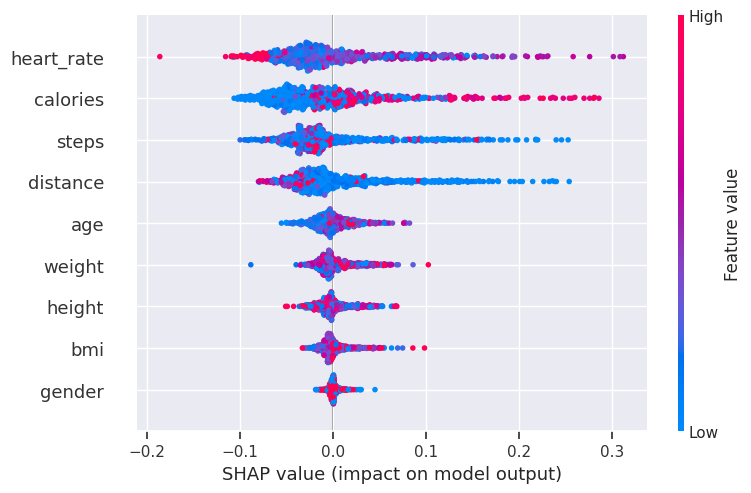

In [137]:
#Let's also see the summary_plot of a specific class i.e. class “Running 3 METs: 1” for Apple Watch
shap.summary_plot(shap_values_apple[1], X_test_apple.values, feature_names = X_test_apple.columns)

1. The summary plot above for Apple Watch combines feature importance with feature effects. 
2. Each point on the summary plot is a Shapley value for a feature and an instance. 
3. The position on the y-axis is determined by the feature and on the x-axis by the Shapley value. 
4. You can see that the feature 'gender', being the least important feature, has low Shapley values. 
5. The color represents the value of the feature from low to high. 
6. Overlapping points are jittered in the y-axis direction, so we get a sense of the distribution of the Shapley values per feature. 
7. The features are ordered according to their importance.
8. In the summary plot, we see the first indications of the relationship between the value of a feature and the impact on the prediction.
9. But to see the exact form of the relationship, we have to look at SHAP dependence plots.

In [138]:
# Mapping created between the original labels and their corresponding encoded labels using a dictionary.
le_fb=label_encoder_fitbit.fit(y_apple)
le_name_mapping_fb = dict(zip(le_fb.classes_, le_fb.transform(le_fb.classes_)))
le_name_mapping_fb

{'Lying': 0,
 'Running 3 METs': 1,
 'Running 5 METs': 2,
 'Running 7 METs': 3,
 'Self Pace walk': 4,
 'Sitting': 5}

In [139]:
# Use inverse_transform method of label_encoder to get the original class labels for Apple Watch
class_labels = le_fb.inverse_transform([4])

# Print the class label corresponding to index 1
print("Class label corresponding to index 1:", class_labels[0])

Class label corresponding to index 1: Self Pace walk


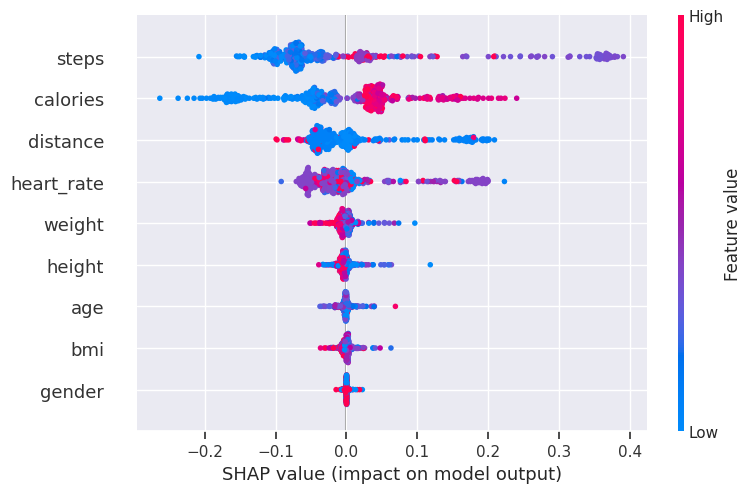

In [140]:
#Let's also see the summary_plot of a specific class for Fitbit
shap.summary_plot(shap_values_fitbit[4], X_test_fitbit.values, feature_names = X_test_fitbit.columns)

# SHAP Dependence Plot -Apple Watch and Fitbit

The partial dependence plot (short PDP or PD plot) shows the marginal effect one or two features have on the predicted outcome of a machine learning model. A partial dependence plot can show whether the relationship between the target and a feature is linear, monotonic, or more complex.

The partial dependence plot is a global method: The method considers all instances and gives a statement about the global relationship of a feature with the predicted outcome. The PDP assumes that the first feature is not correlated with the second feature. If this assumption is violated, the averages calculated for the partial dependence plot will include data points that are very unlikely or even impossible.

A dependence plot is a scatter plot that shows the effect a single feature has on the predictions made by the model. 

Each dot is a single prediction (row) from the dataset.
The x-axis is the actual value from the dataset.
The y-axis is the SHAP value for that feature, which represents how much knowing that feature’s value changes the output of the model for that sample’s prediction.
The color corresponds to a second feature that may have an interaction effect with the feature we are plotting (by default this second feature is chosen automatically). If an interaction effect is present between this other feature and the feature we are plotting it will show up as a distinct vertical pattern of coloring.

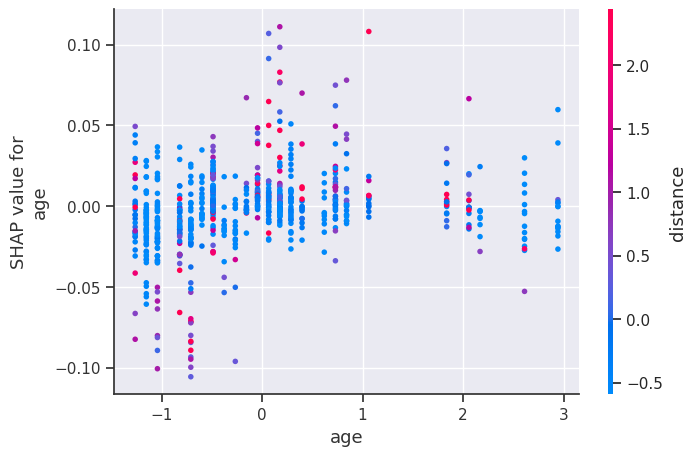

In [141]:
# If we pass a numpy array instead of a data frame then we need to pass the feature names separately
shap.dependence_plot(0, shap_values_apple[0], X_test_apple.values, feature_names=X_test_apple.columns)

In the example above we can see a clear vertical pattern of coloring for the interaction between the features, 'age' and 'distance'.

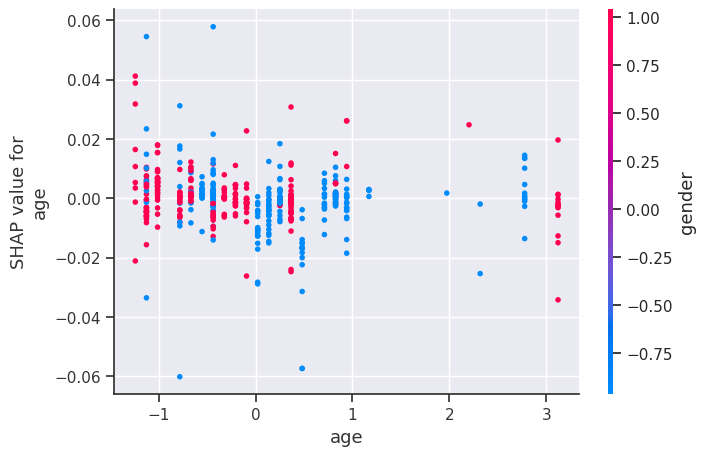

In [142]:
shap.dependence_plot(0, shap_values_fitbit[0], X_test_fitbit.values, feature_names=X_test_fitbit.columns)

# SHAP Force plot for Apple Watch and Fitbit
Force plot gives us the explainability of a single model prediction. In this plot, we can see how features contributed to the model’s prediction for a specific observation. It is very convenient to use for error analysis or a deep understanding of a particular case.

In [143]:
# Run the following command. Needed for some visualizations.
shap.initjs()

In [144]:
# For Apple Watch
explainer = shap.TreeExplainer(rf_model)
i=8
shap.force_plot(explainer.expected_value[0],
                shap_values_apple[0][i],
                X_test_apple.values[i],
                feature_names = X_test_apple.columns)

From the above plot we can see:

The model predict_proba value: 0.03
The base value: this is the value that would be predicted if we didn’t know any features for the current instance. The base value is the average of the model output over the training dataset (explainer.expected_value in the code). In this example base value = 0.2122
The numbers on the plot arrows are the value of the feature for this instance. 
Red represents features that pushed the model score higher, and blue representing features that pushed the score lower.
The bigger the arrow, the bigger the impact of the feature on the output. The amount of decrease or increase in the impact can be seen on the x-axis.

In [145]:
# For Fitbit
explainer = shap.TreeExplainer(rf_model2)
i=8
shap.force_plot(explainer.expected_value[0],
                shap_values_fitbit[0][i],
                X_test_fitbit.values[i],
                feature_names = X_test_fitbit.columns)

# SHAP waterfall plot for Apple Watch and Fitbit
The waterfall plot is another local analysis plot of a single instance prediction. Let’s take instance number 8 as an example:

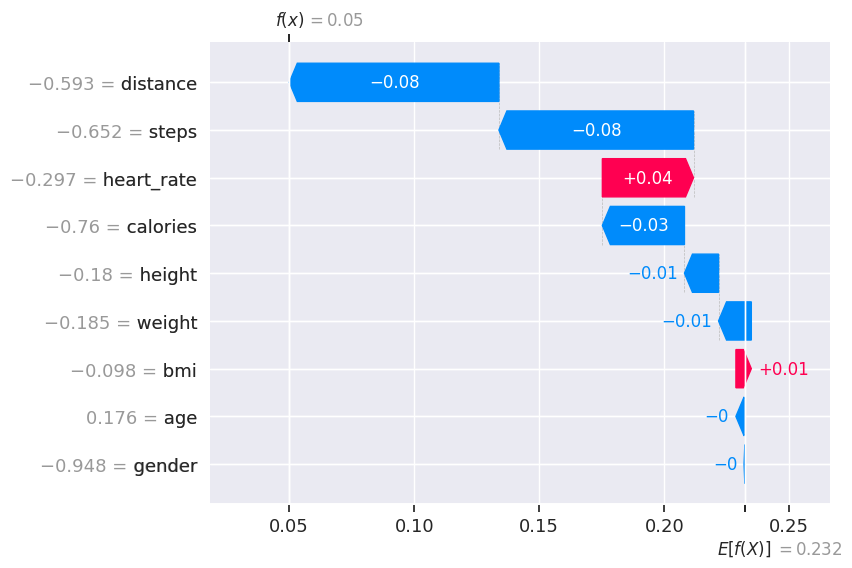

In [146]:
# For Apple Watch
row = 8
shap.waterfall_plot(shap.Explanation(values=shap_values_apple[0][row],
                                     base_values=explainer.expected_value[0],
                                     data=X_test_apple.iloc[row],
                                     feature_names=X_test_apple.columns.tolist()))

In the above plot for Apple Watch, f(x) is the model predict_proba value: 0.04.
E[f(x)] is the base value = 0.232.
On the left are the features value and on the arrows the feature contribution to the prediction.
Each row shows how the positive (red) or negative (blue) contribution of each feature moves the value from the expected model output over the background dataset to the model output for this prediction.

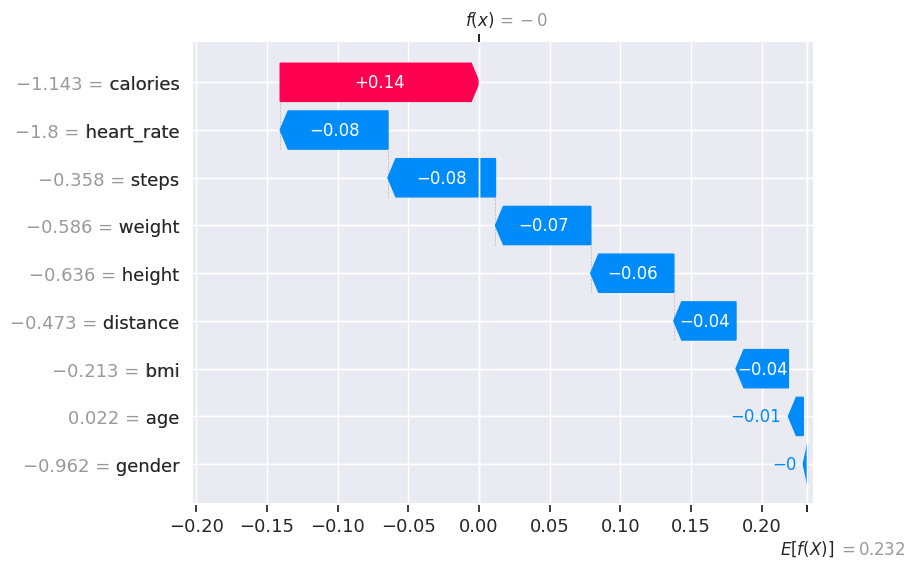

In [147]:
# For Fitbit
row = 8
shap.waterfall_plot(shap.Explanation(values=shap_values_fitbit[0][row],
                                     base_values=explainer.expected_value[0],
                                     data=X_test_fitbit.iloc[row],
                                     feature_names=X_test_fitbit.columns.tolist()))